In [3]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import psycopg2

# Connect to your PostgreSQL database
conn = psycopg2.connect(
    dbname="telecom", 
    user="postgres", 
    password="123456", 
    host="localhost", 
    port="5432"
)

In [6]:
def header_data():
    curr = conn.cursor()
    curr.execute("SELECT * FROM xdr_data LIMIT 10;")
    rows = curr.fetchall()
    for row in rows:
        print('\t'.join(map(str, row)))
header_data()

1.31144834608449e+19	4/4/2019 12:01	770.0	4/25/2019 14:35	662.0	1823652.0	208201448079117.0	33664962239.0	35521209507511.0	9.16456699548519E+015	42.0	5.0	23.0	44.0	None	None	100.0	0.0	0.0	0.0	100.0	0.0	0.0	0.0	None	None	37624.0	38787.0	1823652892.0	Samsung	Samsung Galaxy A5 Sm-A520F	None	None	None	None	None	None	213.0	214.0	1545765.0	24420.0	1634479.0	1271433.0	3563542.0	137762.0	15854611.0	2501332.0	8198936.0	9656251.0	278082303.0	14344150.0	171744450.0	8814393.0	36749741.0	308879636.0
1.31144834828789e+19	4/9/2019 13:04	235.0	4/25/2019 8:15	606.0	1365104.0	208201909211140.0	33681854413.0	35794009006359.0	L77566A	65.0	5.0	16.0	26.0	None	None	100.0	0.0	0.0	0.0	100.0	0.0	0.0	0.0	None	None	168.0	3560.0	1365104371.0	Samsung	Samsung Galaxy J5 (Sm-J530)	None	None	None	None	None	None	971.0	1022.0	1926113.0	7165.0	3493924.0	920172.0	629046.0	308339.0	20247395.0	19111729.0	18338413.0	17227132.0	608750074.0	1170709.0	526904238.0	15055145.0	53800391.0	653384965.0
1.31144834840805e+19	4/9/2019 17

In [5]:
def get_top_10_handsets():
    try:
        # Create a cursor to execute queries
        cur = conn.cursor()
        
        # Execute the corrected query to get the top 10 handsets
        cur.execute("""
            SELECT "Handset Type", COUNT(*) AS usage_count
            FROM xdr_data
            GROUP BY "Handset Type"
            ORDER BY usage_count DESC
            LIMIT 10;
        """)
        
        # Fetch all rows from the result
        top_handsets = cur.fetchall()
        
        # Close the cursor
        cur.close()
        
        return top_handsets

    except Exception as e:
        print(f"Error: {e}")
        conn.rollback()  # Rollback in case of error
        return []  # Return an empty list in case of error

# Call the function and print the top 10 handsets
handsets = get_top_10_handsets()
if handsets:  # Check if handsets is not empty
    for handset, count in handsets:
        print(f"Handset: {handset}, Usage Count: {count}")
else:
    print("No handsets data available or an error occurred.")


Handset: Huawei B528S-23A, Usage Count: 19752
Handset: Apple iPhone 6S (A1688), Usage Count: 9419
Handset: Apple iPhone 6 (A1586), Usage Count: 9023
Handset: undefined, Usage Count: 8987
Handset: Apple iPhone 7 (A1778), Usage Count: 6326
Handset: Apple iPhone Se (A1723), Usage Count: 5187
Handset: Apple iPhone 8 (A1905), Usage Count: 4993
Handset: Apple iPhone Xr (A2105), Usage Count: 4568
Handset: Samsung Galaxy S8 (Sm-G950F), Usage Count: 4520
Handset: Apple iPhone X (A1901), Usage Count: 3813


In [41]:
def get_top_10_handsets():
    try:
        # Create a cursor to execute queries
        cur = conn.cursor()
        
        # Execute the corrected query to get the top 10 handsets
        cur.execute("""
            SELECT "Handset Manufacturer", COUNT(*) AS usage_count
            FROM xdr_data
            GROUP BY "Handset Manufacturer"
            ORDER BY usage_count DESC
            LIMIT 3;
        """)
        
        # Fetch all rows from the result
        top_handsets = cur.fetchall()
        
        # Close the cursor
        cur.close()
        
        return top_handsets

    except Exception as e:
        print(f"Error: {e}")
        conn.rollback()  # Rollback in case of error
        return []  # Return an empty list in case of error

# Call the function and print the top 10 handsets
handsets = get_top_10_handsets()
if handsets:  # Check if handsets is not empty
    for handset, count in handsets:
        print(f"Handset manufacturer: {handset}, Usage Count: {count}")
else:
    print("No handsets data available or an error occurred.")


Handset manufacturer: Apple, Usage Count: 59565
Handset manufacturer: Samsung, Usage Count: 40839
Handset manufacturer: Huawei, Usage Count: 34423


In [43]:
def get_top_5_handsets_per_top_3_manufacturers():
    try:
        # Create a cursor to execute queries
        cur = conn.cursor()

        # Execute the SQL query
        cur.execute("""
            WITH top_manufacturers AS (
                SELECT "Handset Manufacturer", COUNT(*) AS usage_count
                FROM xdr_data
                GROUP BY "Handset Manufacturer"
                ORDER BY usage_count DESC
                LIMIT 3
            )
            SELECT "Handset Manufacturer", "Handset Type", COUNT(*) AS usage_count
            FROM xdr_data
            WHERE "Handset Manufacturer" IN (SELECT "Handset Manufacturer" FROM top_manufacturers)
            GROUP BY "Handset Manufacturer", "Handset Type"
            ORDER BY "Handset Manufacturer", usage_count DESC
            LIMIT 5;
        """)

        # Fetch all rows from the result
        top_handsets = cur.fetchall()

        # Close the cursor
        cur.close()

        return top_handsets

    except Exception as e:
        print(f"Error: {e}")
        conn.rollback()  # Rollback in case of error
        return []  # Return an empty list in case of error

# Call the function and print the result
handsets = get_top_5_handsets_per_top_3_manufacturers()
if handsets:  # Check if handsets is not empty
    for manufacturer, handset, count in handsets:
        print(f"Manufacturer: {manufacturer}, Handset: {handset}, Usage Count: {count}")
else:
    print("No handset data available or an error occurred.")


    

Manufacturer: Apple, Handset: Apple iPhone 6S (A1688), Usage Count: 9419
Manufacturer: Apple, Handset: Apple iPhone 6 (A1586), Usage Count: 9023
Manufacturer: Apple, Handset: Apple iPhone 7 (A1778), Usage Count: 6326
Manufacturer: Apple, Handset: Apple iPhone Se (A1723), Usage Count: 5187
Manufacturer: Apple, Handset: Apple iPhone 8 (A1905), Usage Count: 4993


In [58]:
import pandas as pd
def size():
    try:
        cur = conn.cursor()
        cur.execute("SELECT * FROM  xdr_data")
        data = cur.fetchall()
        column_names = [column[0] for column in cur.description]
        data_frame = pd.DataFrame(data, columns = column_names)
        return data_frame.size
    except Exception as e:
        print(f"error: {e}")
    
size()
    

8250055

In [63]:
import pandas as pd
def shape():
    try:
        cur = conn.cursor()
        cur.execute("SELECT * FROM  xdr_data")
        data = cur.fetchall()
        column_names = [column[0] for column in cur.description]
        data_frame = pd.DataFrame(data, columns = column_names)
        return data_frame.size
    except Exception as e:
        print(f"error:{e}")
shape()

8250055

In [64]:
import pandas as pd
def info():
    try:
        cur = conn.cursor()
        cur.execute("SELECT * FROM  xdr_data")
        data = cur.fetchall()
        column_names = [column[0] for column in cur.description]
        data_frame = pd.DataFrame(data, columns = column_names)
        return data_frame.info()
    except Exception as e:
        print(f"error:{e}")
info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [67]:
import pandas as pd
def statisticalInfor():
    try:
        cur = conn.cursor()
        cur.execute("SELECT * FROM  xdr_data")
        data = cur.fetchall()
        column_names = [column[0] for column in cur.description]
        data_frame = pd.DataFrame(data, columns = column_names)
        return data_frame.describe()
    except Exception as e:
        print(f"error:{e}")
statisticalInfor()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [71]:
import pandas as pd

def fetch_data():
    try:
        cur = conn.cursor()
        cur.execute("SELECT * FROM xdr_data;")
        data = cur.fetchall()
        column_names = [column[0] for column in cur.description]
        data_frame = pd.DataFrame(data, columns=column_names)
        return data_frame
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def quantiles(quantile_values):
    try:
        data_frame = fetch_data()
        
        if data_frame is not None:
            # Convert columns to numeric where possible
            numeric_data_frame = data_frame.apply(pd.to_numeric, errors='coerce')

            # Calculate quantiles only for numeric columns
            result = numeric_data_frame.quantile(quantile_values)
            print(f"Quantiles for {quantile_values}:")
            print(result)
        else:
            print("No data to process.")
    except Exception as e:
        print(f"Error: {e}")

quantiles([0.25, 0.5, 0.75])  # Calculate 25th, 50th (median), and 75th percentiles


Quantiles for [0.25, 0.5, 0.75]:
         Bearer Id  Start  Start ms  End  End ms  Dur. (ms)          IMSI  \
0.25  7.349883e+18    NaN     250.0  NaN   251.0   57440.50  2.082014e+14   
0.50  7.349883e+18    NaN     499.0  NaN   500.0   86399.00  2.082015e+14   
0.75  1.304243e+19    NaN     749.0  NaN   750.0  132430.25  2.082018e+14   

      MSISDN/Number          IMEI  Last Location Name  ...  \
0.25   3.365130e+10  3.546071e+13        9.164567e+15  ...   
0.50   3.366371e+10  3.572201e+13        9.164567e+15  ...   
0.75   3.368349e+10  8.611970e+13        9.164567e+15  ...   

      Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0.25           5833501.0           5517965.0           5777156.0   
0.50          11616019.0          11013447.0          11642217.0   
0.75          17448518.0          16515562.0          17470478.0   

      Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
0.25           5475981.0        210473253.0          4128476.0   
0.50

In [76]:
# Import the function from the utils module
from utils import fetch_data

# Assuming you have a valid connection object `conn`
data_frame = fetch_data(conn)
print(data_frame.isnull().sum())
    

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [97]:
import pandas as pd
from utils import fetch_data

# Fetch data
df = fetch_data(conn)

def remove_outliers_iqr(df):
    try:
        # Print numeric columns
        numeric_columns = df.select_dtypes(include=['number']).columns
        print("Numeric columns in DataFrame:")
        print(numeric_columns)
        
        # Create a copy of the DataFrame to avoid modifying the original
        cleaned_df = df.copy()
        
        for column in numeric_columns:
            # Compute Q1 (25th percentile) and Q3 (75th percentile) for the column
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            print(f"Column '{column}' - Q1: {Q1}, Q3: {Q3}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

            # Remove outliers
            cleaned_df = cleaned_df[(cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)]
        
        print("DataFrame after outlier removal:")
        print(cleaned_df.head())
        return cleaned_df

    except Exception as e:
        print(f"Error: {e}")
        return None

# Call the function and assign the cleaned DataFrame to a new variable
cleaned_df = remove_outliers_iqr(df)


Numeric columns in DataFrame:
Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with

In [9]:
import sys
import os

# Set the path to the parent directory (use raw string to handle backslashes)
sys.path.append(os.path.abspath(r'C:\Gedebie\finTech AI\week2\telecom_data_analysis'))

# Import the fetch_data function from the utils module
from utils import fetch_data

# Example usage
df = fetch_data(conn)


def check_invalid_values(df):
    try:
        #check null values
        null_values = df.isnull().sum()
        print(f"the null values:{null_values}")
        # Check for NaN values
        nan_count = df.isna().sum().sum()
        print(f"Total NaN values in the DataFrame: {nan_count}")

        # Check for NaN values in each column
        nan_per_column = df.isna().sum()
        print("NaN values per column:")
        print(nan_per_column)

        # Check for Infinite values
        inf_count = df.isin([float('inf'), float('-inf')]).sum().sum()
        print(f"Total Infinite values in the DataFrame: {inf_count}")

        # Check for Infinite values in each column
        inf_per_column = df.isin([float('inf'), float('-inf')]).sum()
        print("Infinite values per column:")
        print(inf_per_column)

        # Check for Non-Numeric Values in Numeric Columns
        numeric_columns = df.select_dtypes(include=['number']).columns
        for column in numeric_columns:
            non_numeric_values = df[~df[column].apply(pd.to_numeric, errors='coerce').notna()][column]
            if not non_numeric_values.empty:
                print(f"Non-numeric values in column '{column}':")
                print(non_numeric_values)

    except Exception as e:
        print(f"Error: {e}")

# Call the function
check_invalid_values(df)



the null values:Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps 

In [15]:
import sys
import os

# Set the path to the parent directory (use raw string to handle backslashes)
sys.path.append(os.path.abspath(r'C:\Gedebie\finTech AI\week2\telecom_data_analysis'))

# Import the fetch_data function from the utils module
from utils import fetch_data

# Example usage
df = fetch_data(conn)
def fill_null(df):
    # Print the null values before filling
    null_values_before = df.isnull().sum()
    print(f"Null values before filling:\n{null_values_before}")

    # Fill null values with 0 and assign the result to a new DataFrame
    filled_df = df.fillna(0)
    
    # Print the null values after filling
    null_values_after = filled_df.isnull().sum()
    print(f"Null values after filling:\n{null_values_after}")
    
    return filled_df

# Example usage (assuming df is your DataFrame)
df = fetch_data(conn)  # Replace with your actual data fetching method
filled_df = fill_null(df)

Null values before filling:
Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL 

In [9]:
import sys
import os

# Set the path to the parent directory (use raw string to handle backslashes)
sys.path.append(os.path.abspath(r'C:\Gedebie\finTech AI\week2\telecom_data_analysis'))

# Import the fetch_data function from the utils module
from utils import fetch_data

# Example usage
df = fetch_data(conn)

def agreggated_data():
    agregate = df.groupby('IMEI').agg({
        'Bearer Id': 'sum',
        'Dur. (ms)': 'sum',
        'Avg Bearer TP DL (kbps)': 'sum',
        'Avg Bearer TP UL (kbps)': 'sum',
        'HTTP UL (Bytes)': 'sum',
        'HTTP DL (Bytes)': 'sum'
    })
    
    print("Aggregated DataFrame per user:")
    print(agregate)
    
    return agregate

agreggated_data()



Aggregated DataFrame per user:
                 Bearer Id  Dur. (ms)  Avg Bearer TP DL (kbps)  \
IMEI                                                             
4.400152e+11  6.917538e+18    74399.0                      1.0   
4.402138e+11  6.917538e+18    86399.0                    300.0   
1.194901e+12  6.917538e+18    87799.0                    173.0   
1.198201e+12  6.917538e+18    56344.0                   3746.0   
1.202601e+12  6.917538e+18    18004.0                     33.0   
...                    ...        ...                      ...   
9.900120e+13  7.277826e+18    17217.0                    127.0   
9.900120e+13  1.311448e+19    84563.0                     42.0   
9.900120e+13  1.304243e+19     9321.0                  26234.0   
9.900120e+13  7.349883e+18   100874.0                     43.0   
9.900120e+13  1.304243e+19    32614.0                  26426.0   

              Avg Bearer TP UL (kbps)  HTTP UL (Bytes)  HTTP DL (Bytes)  
IMEI                                

,Bearer Id,Dur. (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),HTTP UL (Bytes),HTTP DL (Bytes)
IMEI,,,,,,
4.400152e+11,6.917538e+18,74399.0,1.0,1.0,0.0,0.0
4.402138e+11,6.917538e+18,86399.0,300.0,51.0,12475.0,42252.0
1.194901e+12,6.917538e+18,87799.0,173.0,14.0,3402.0,63703.0
1.198201e+12,6.917538e+18,56344.0,3746.0,238.0,85162.0,1227847.0
1.202601e+12,6.917538e+18,18004.0,33.0,9.0,0.0,0.0
...,...,...,...,...,...,...
9.900120e+13,7.277826e+18,17217.0,127.0,25.0,0.0,0.0
9.900120e+13,1.311448e+19,84563.0,42.0,56.0,0.0,0.0
9.900120e+13,1.304243e+19,9321.0,26234.0,590.0,15942.0,8223.0


In [18]:
import pandas as pd

# Fetch the data
df = fetch_data(conn)  # Assuming the data is already loaded

def segment_users_by_duration():
    # Step 1: Aggregate the total session duration and total data per user
    user_data = df.groupby('IMEI').agg({
        'Dur. (ms)': 'sum',                       # Total duration per user
        'Total DL (Bytes)': 'sum',                # Total download per user
        'Total UL (Bytes)': 'sum'                 # Total upload per user
    }).reset_index()

    # Step 2: Compute the total data (DL + UL) for each user
    user_data['Total Data (Bytes)'] = user_data['Total DL (Bytes)'] + user_data['Total UL (Bytes)']
    print(user_data)

    # Step 3: Create deciles based on the total duration
    user_data['Decile'] = pd.qcut(user_data['Dur. (ms)'], 10, labels=False) + 1  # 10 deciles (1-10)

    # Step 4: Filter for the top five deciles (decile 6 to 10)
    top_deciles = user_data[user_data['Decile'] >= 6]

    # Step 5: Compute the total data per decile class
    decile_aggregates = top_deciles.groupby('Decile').agg({
        'Total Data (Bytes)': 'sum',
        'Dur. (ms)': 'sum'
    })
    Min = user_data['Total Data (Bytes)'].min()
    Max = user_data['Total Data (Bytes)'].max()
    print("Min and max of Total data")
    print(Min)
    print(Max)

    Min = user_data['Dur. (ms)'].min()
    Max = user_data['Dur. (ms)'].max()
    print("Dur. (ms)")
    print(Min)
    print(Max)

    print("Total data (DL + UL) per decile class:")

    return decile_aggregates

# Call the function
segment_users_by_duration()


                IMEI  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0       4.400152e+11    74399.0       196385061.0        39425114.0   
1       4.402138e+11    86399.0       133661264.0        24856321.0   
2       1.194901e+12    87799.0       858892798.0        44409558.0   
3       1.198201e+12    56344.0       791029122.0        54841047.0   
4       1.202601e+12    18004.0       795829234.0        38070613.0   
...              ...        ...               ...               ...   
107265  9.900120e+13    17217.0       857848384.0        27515078.0   
107266  9.900120e+13    84563.0       287049110.0        52510613.0   
107267  9.900120e+13     9321.0       334422603.0        60705879.0   
107268  9.900120e+13   100874.0       865582569.0        62463092.0   
107269  9.900120e+13    32614.0       483796100.0        47523160.0   

        Total Data (Bytes)  
0              235810175.0  
1              158517585.0  
2              903302356.0  
3              845870169.0  
4 

,Total Data (Bytes),Dur. (ms)
Decile,,
6,6.453892e+12,1.255880e+09
7,6.174791e+12,1.582193e+09
8,7.843768e+12,1.874683e+09
9,9.329748e+12,2.493008e+09
10,1.491499e+13,5.124897e+09


In [30]:
import pandas as pd
import numpy as np

# Assuming fetch_data function fetches the data from the connection
df = fetch_data(conn)

def non_graphics_analysis(df):
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    # Display basic statistics for each numeric column
    for column in numeric_columns:
        Mean = df[column].mean()
        Median =  df[column].median()
        Std = df[column].std()
        Var = df[column].var()
        Min = df[column].min()
        Max = df[column].max()
        Range = df[column].max() - df[column].min()
        print(f"\nAnalysis for column: {column}\nAnalysis for for mean: {Mean}\nAnalysis for median: {Median}\nAnalysis for std: {Std}\nAnalysis for var: {Var}\nAnalysis for min: {Min}\nAnalysis for max:{Max}\nAnalysis for Range:{Range}")

# Run the analysis
non_graphics_analysis(df)




Analysis for column: Bearer Id
Analysis for for mean: 1.013887465425634e+19
Analysis for median: 7.349883264156585e+18
Analysis for std: 2.893172512268411e+18
Analysis for var: 8.370447185745508e+36
Analysis for min: 6.91753751854353e+18
Analysis for max:1.31865411671342e+19
Analysis for Range:6.26900364859067e+18

Analysis for column: Start ms
Analysis for for mean: 499.1882
Analysis for median: 499.0
Analysis for std: 288.6118342445999
Analysis for var: 83296.79086603242
Analysis for min: 0.0
Analysis for max:999.0
Analysis for Range:999.0

Analysis for column: End ms
Analysis for for mean: 498.80088
Analysis for median: 500.0
Analysis for std: 288.097653200457
Analysis for var: 83000.25777961078
Analysis for min: 0.0
Analysis for max:999.0
Analysis for Range:999.0

Analysis for column: Dur. (ms)
Analysis for for mean: 104608.56034666667
Analysis for median: 86399.0
Analysis for std: 81037.62147900184
Analysis for var: 6567096094.97398
Analysis for min: 7142.0
Analysis for max:18593

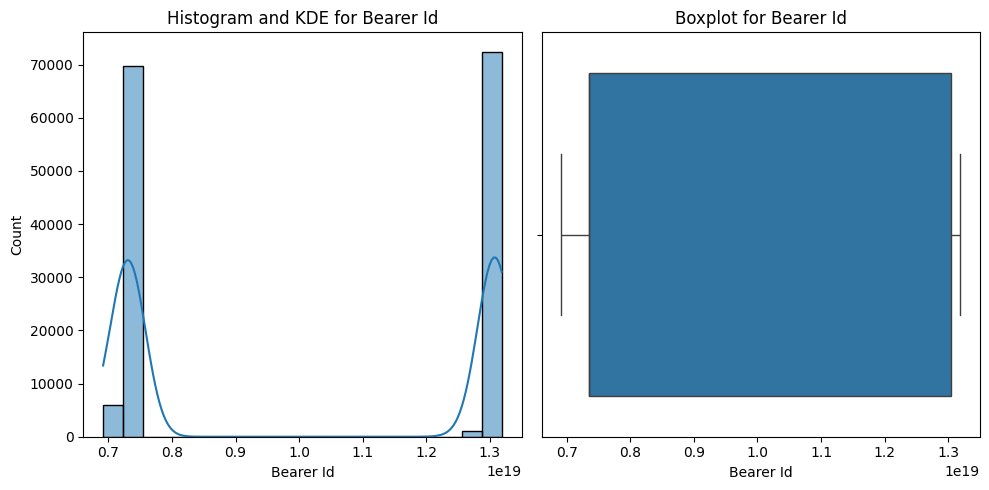

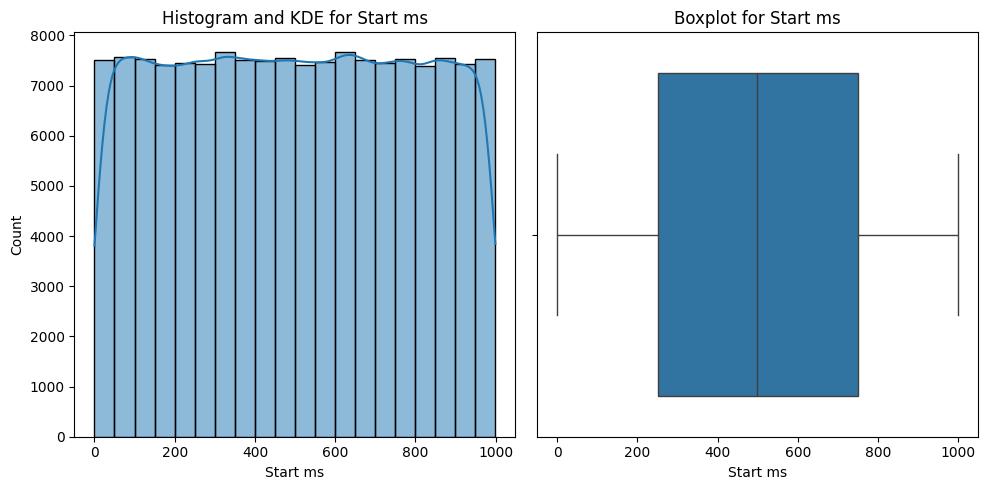

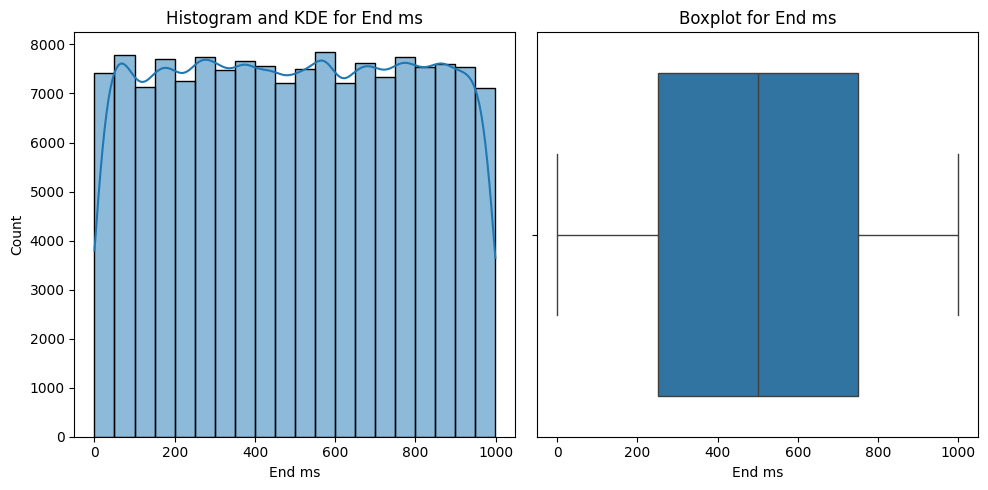

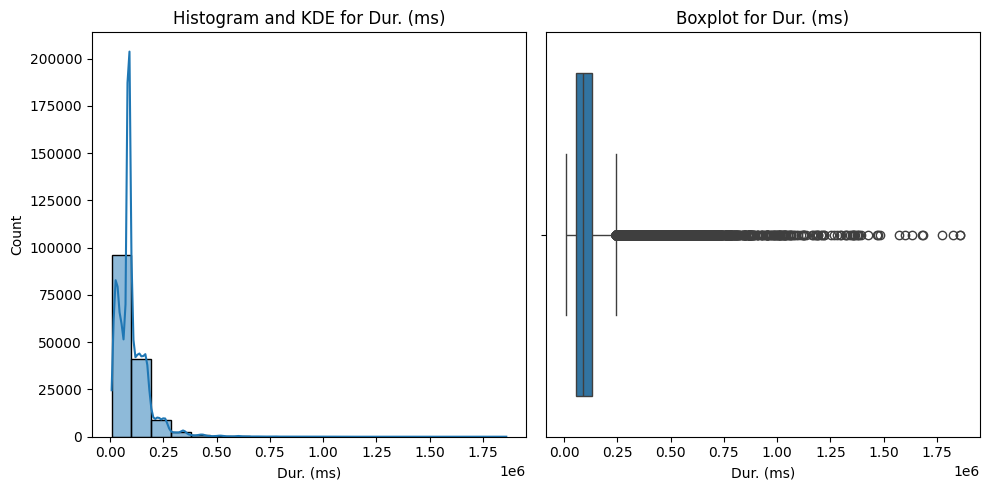

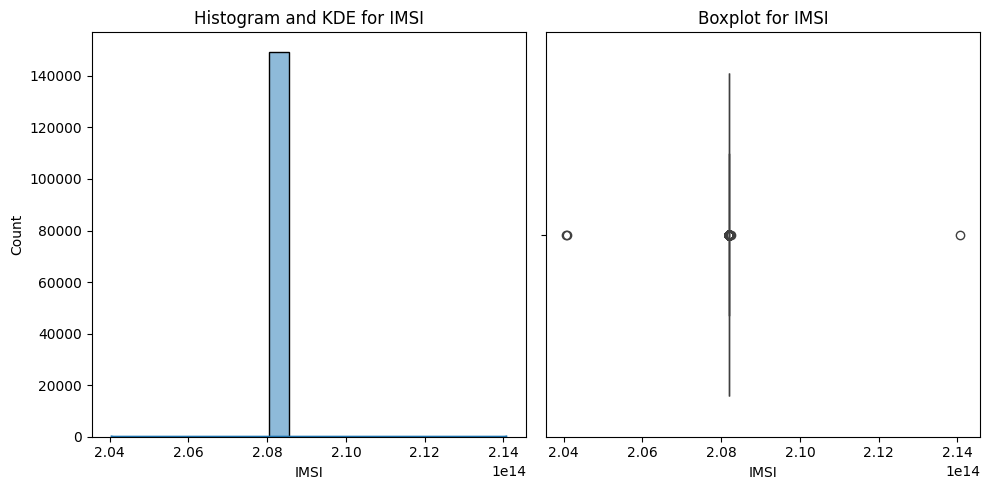

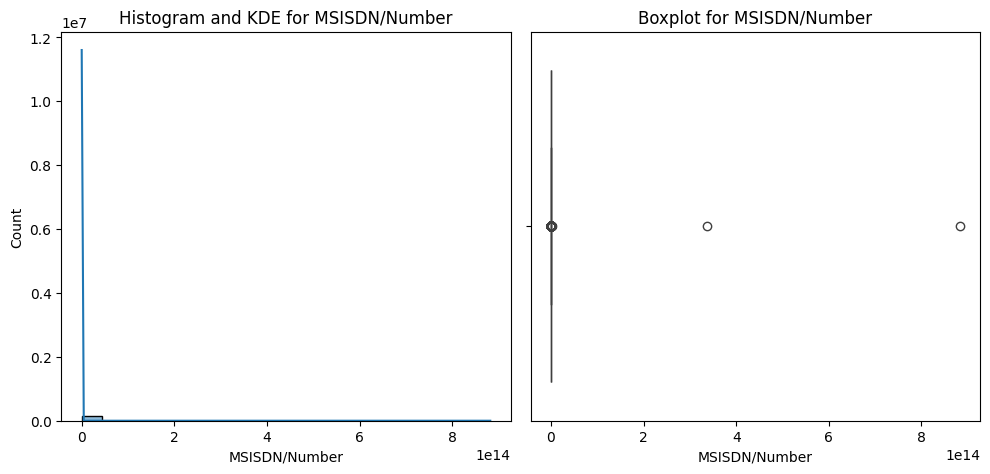

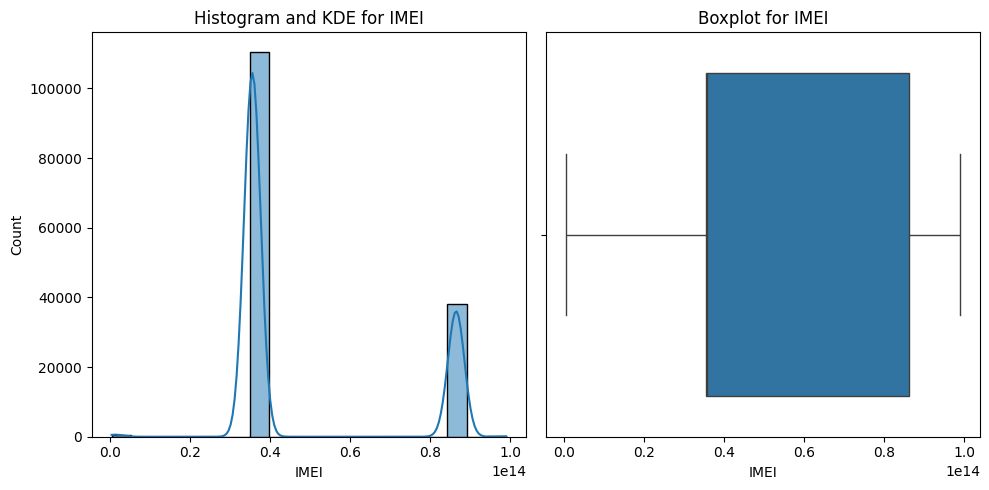

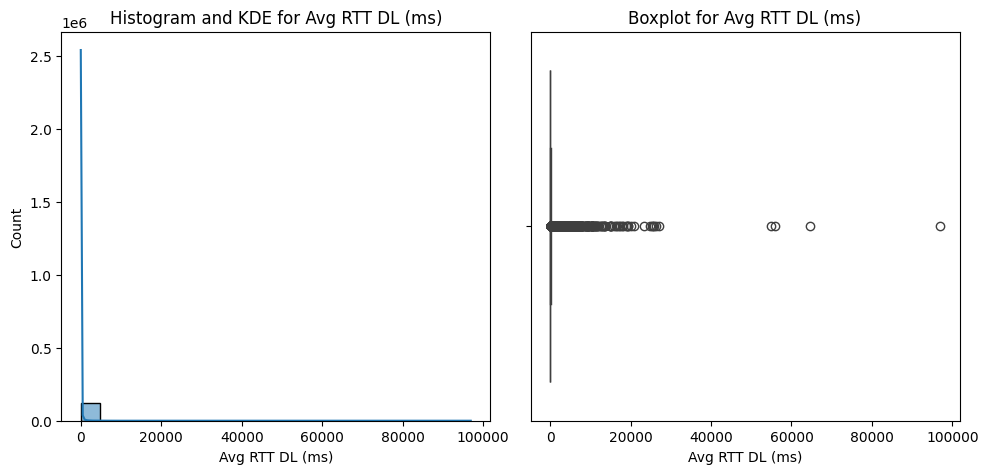

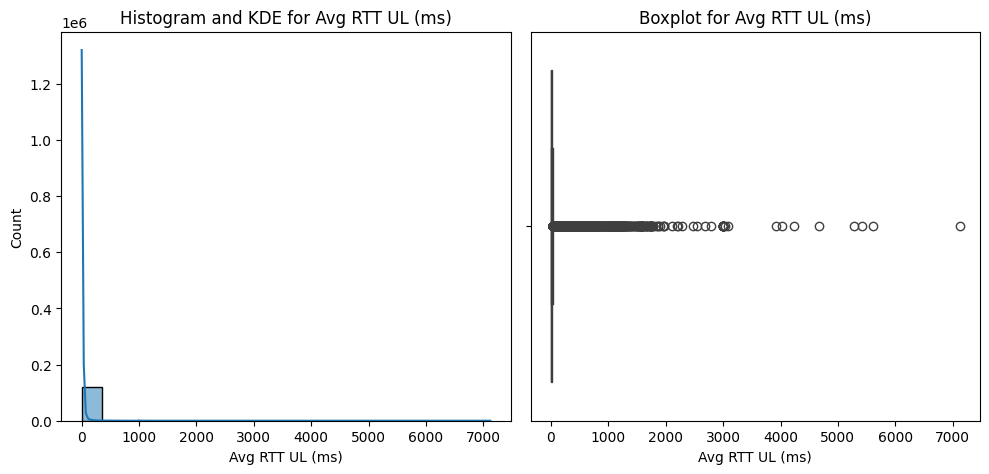

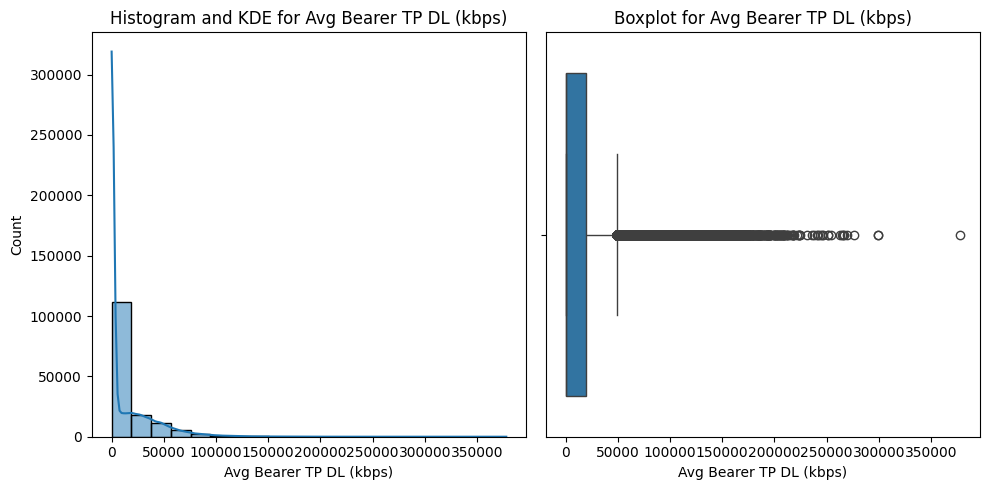

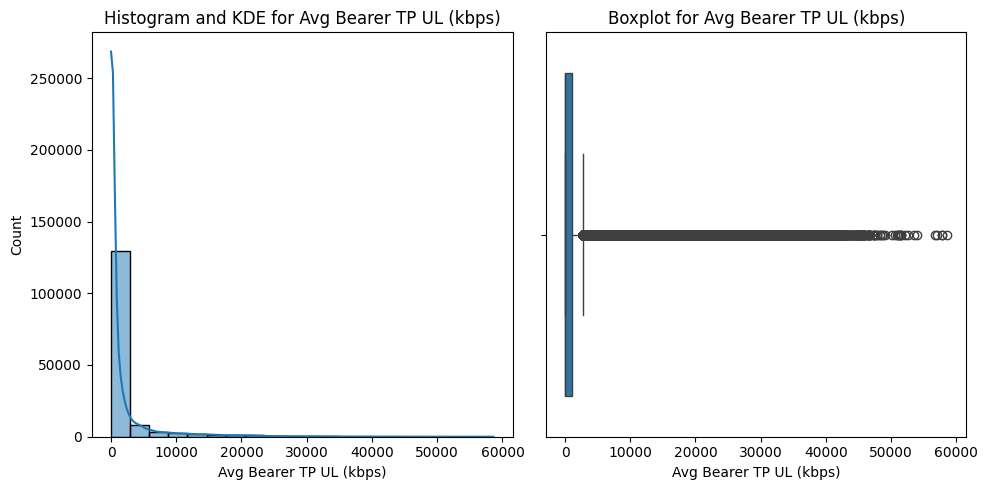

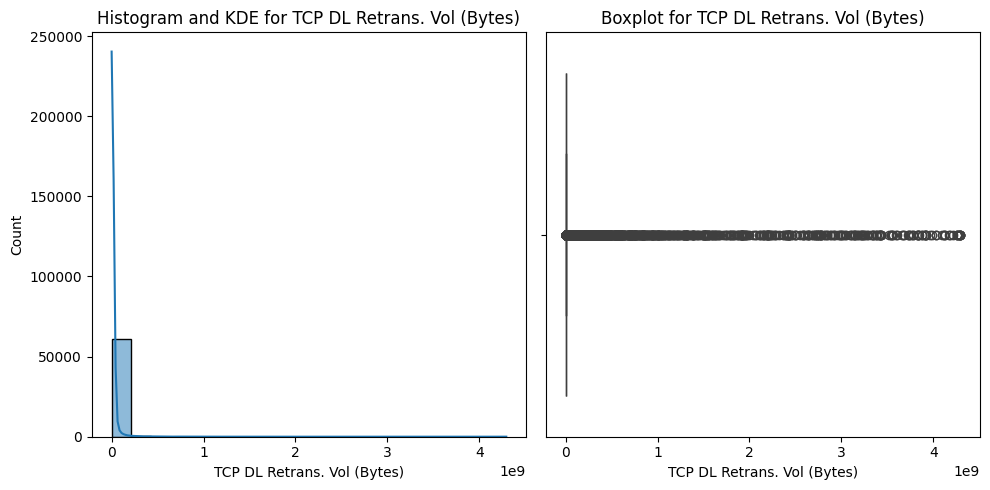

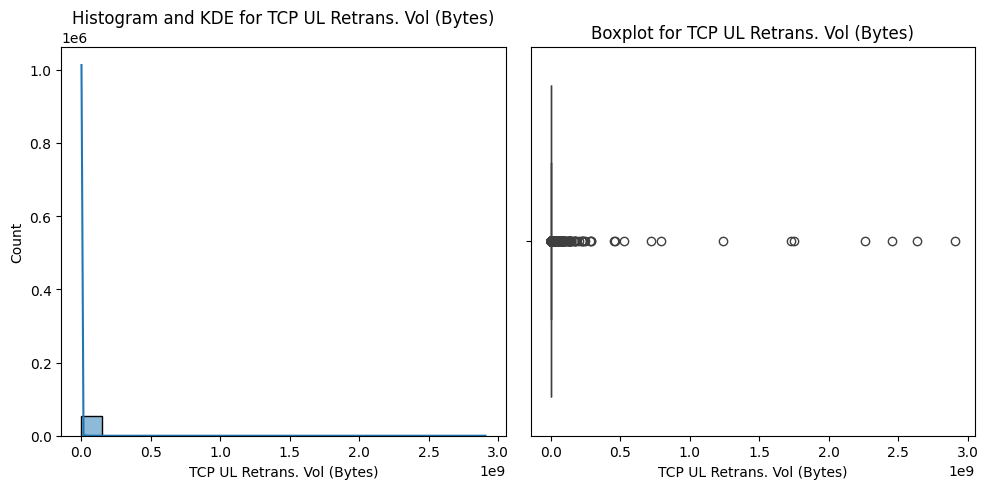

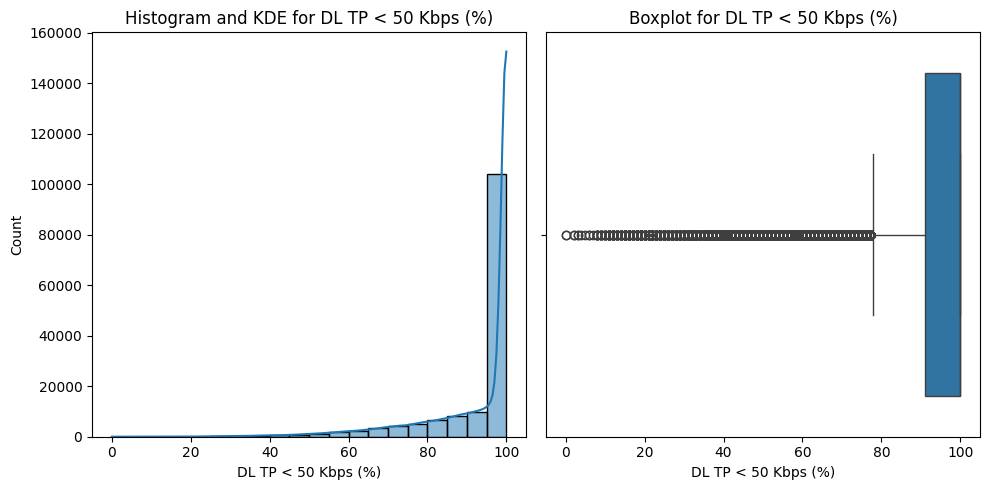

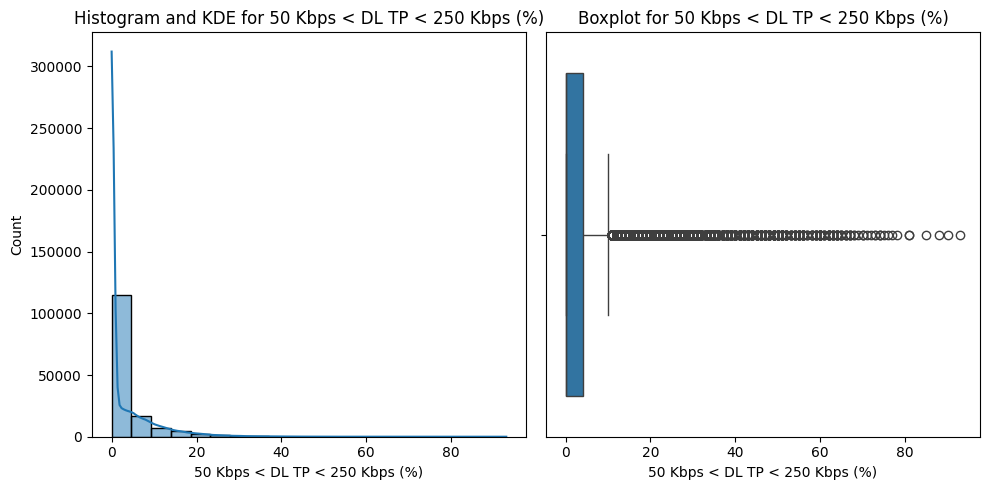

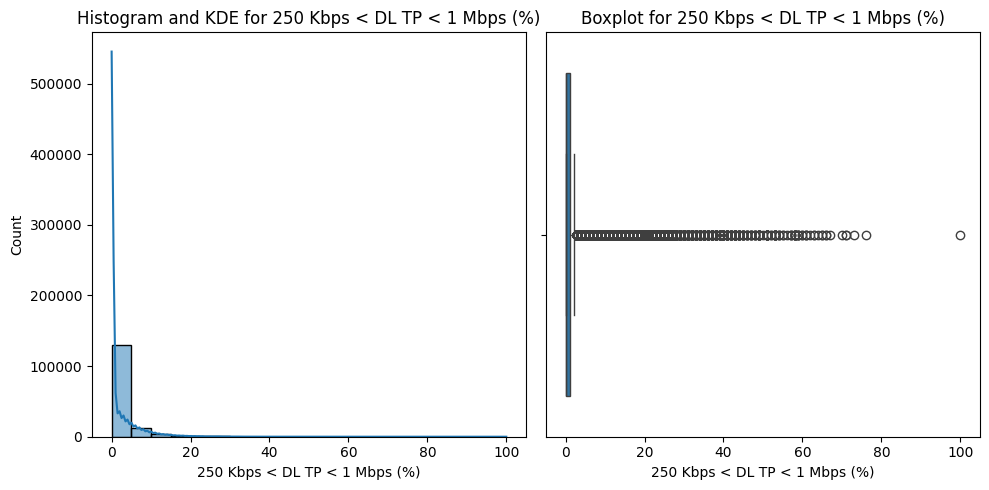

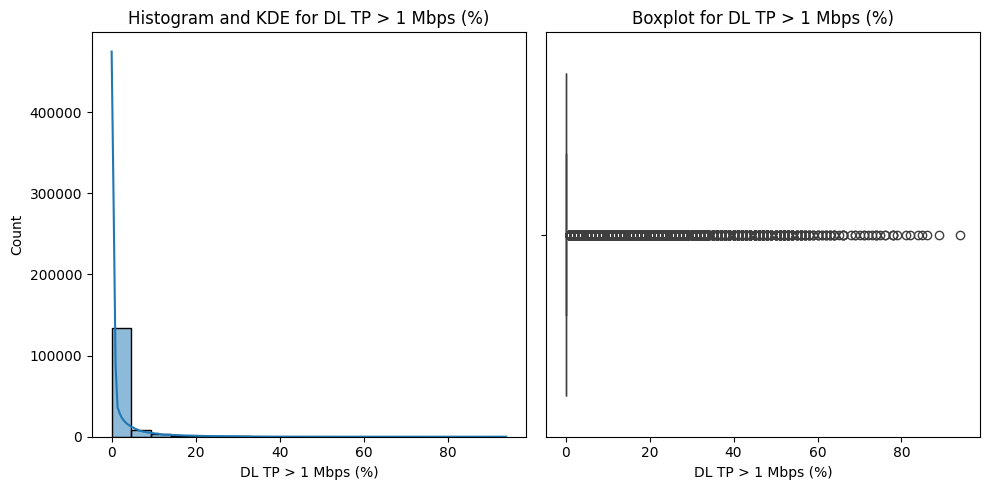

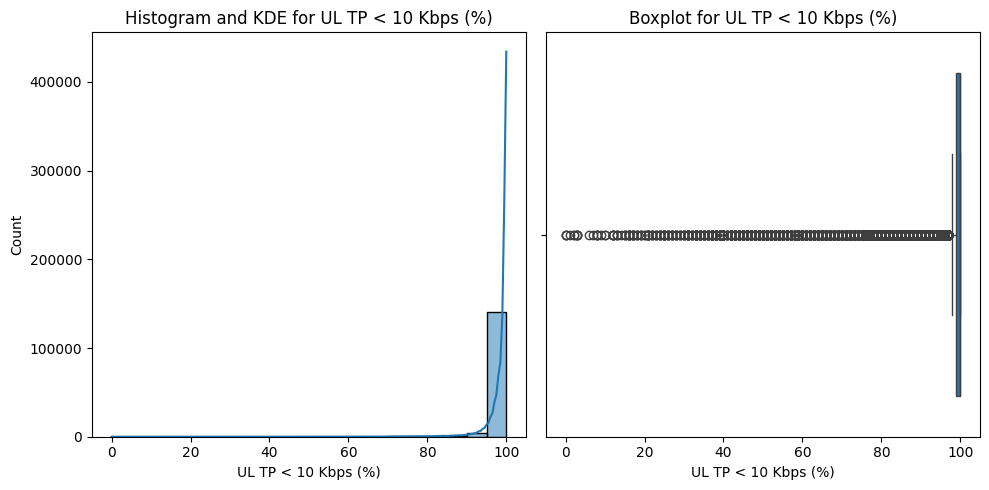

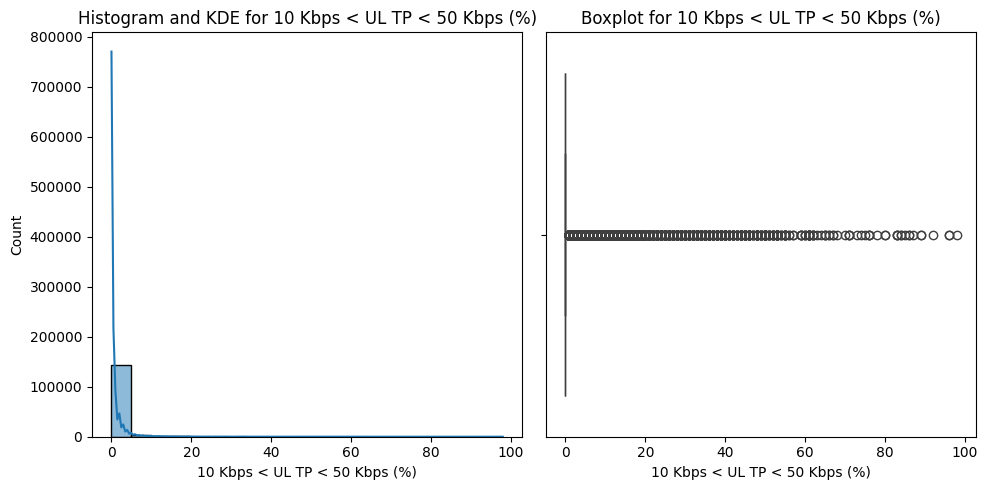

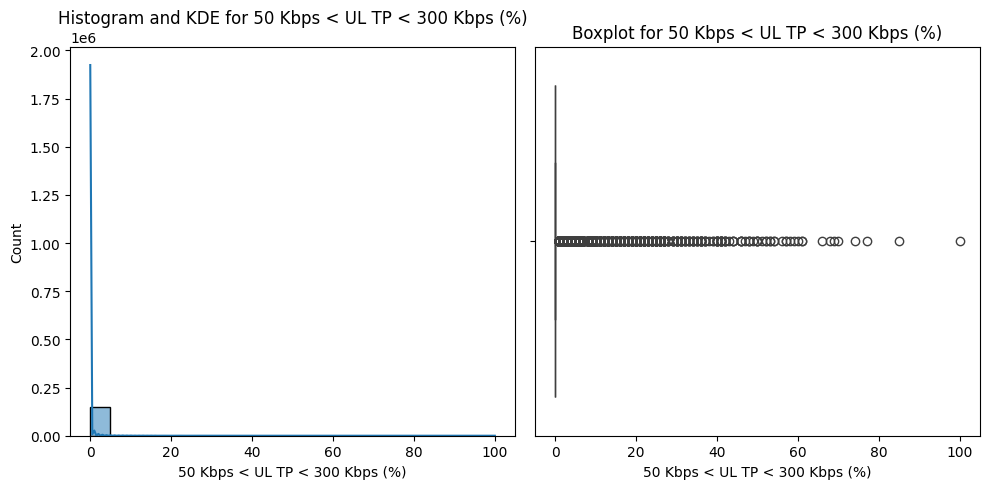

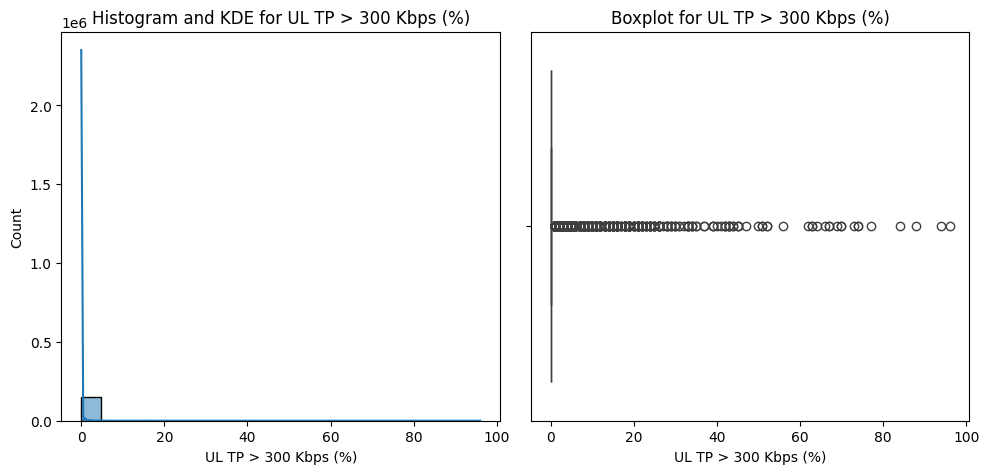

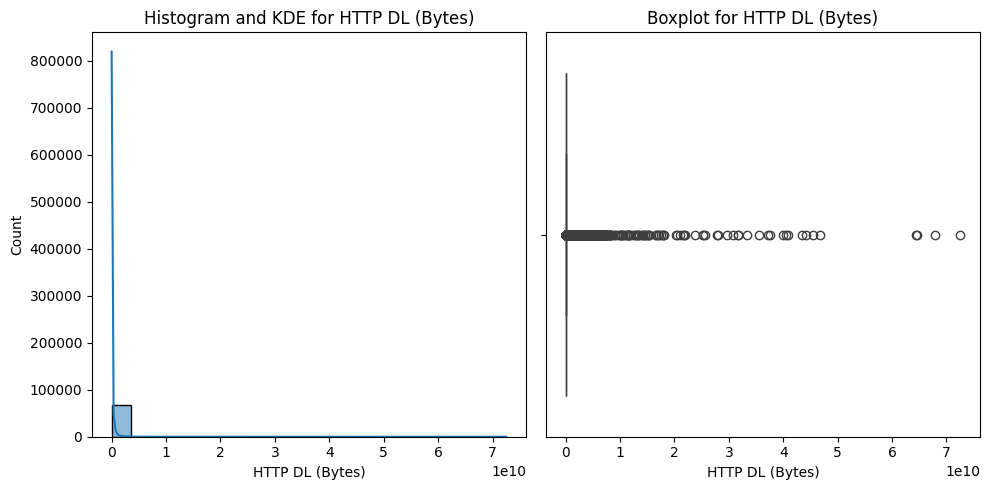

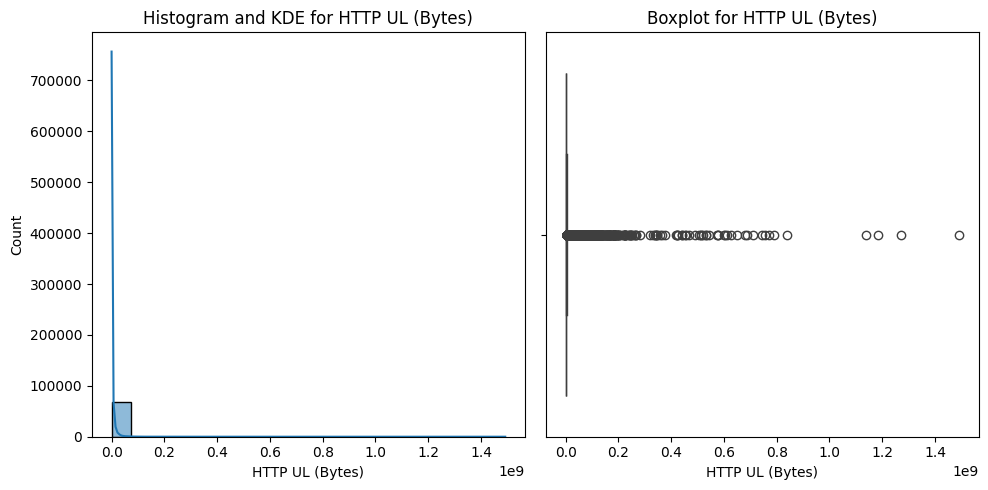

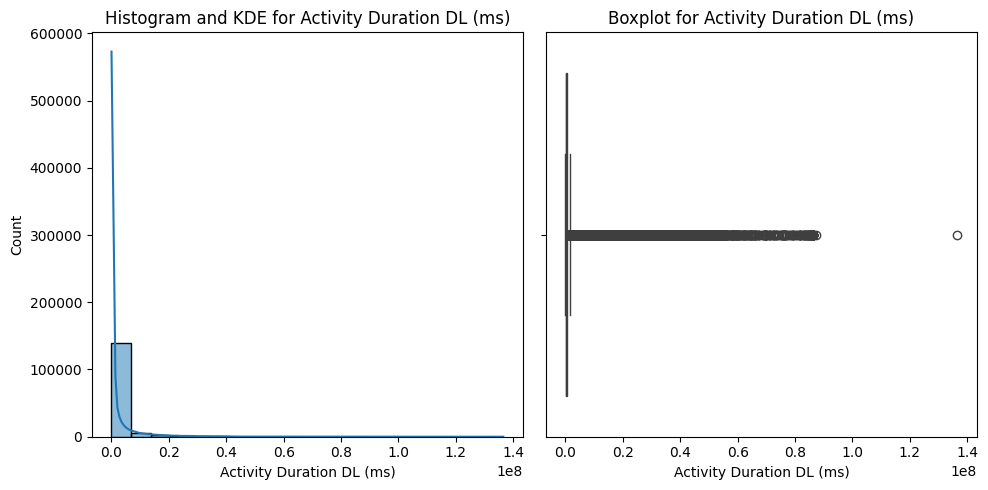

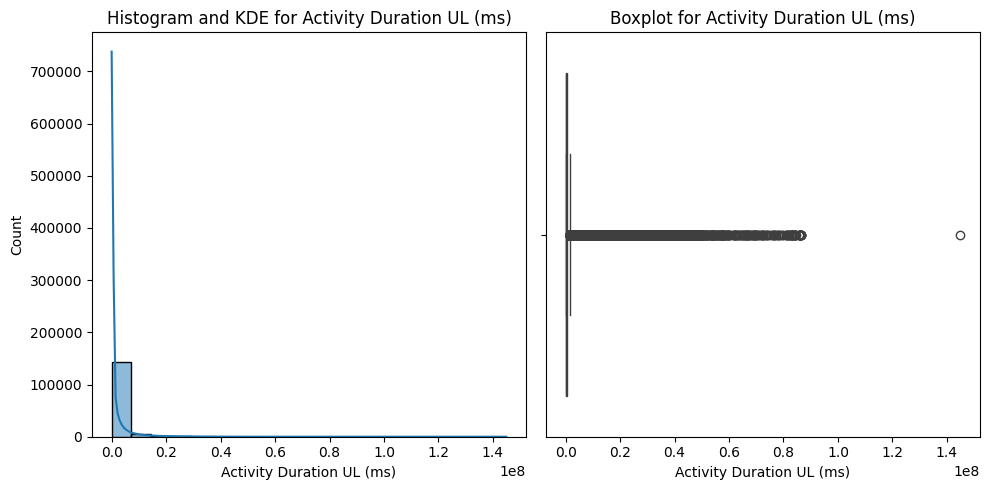

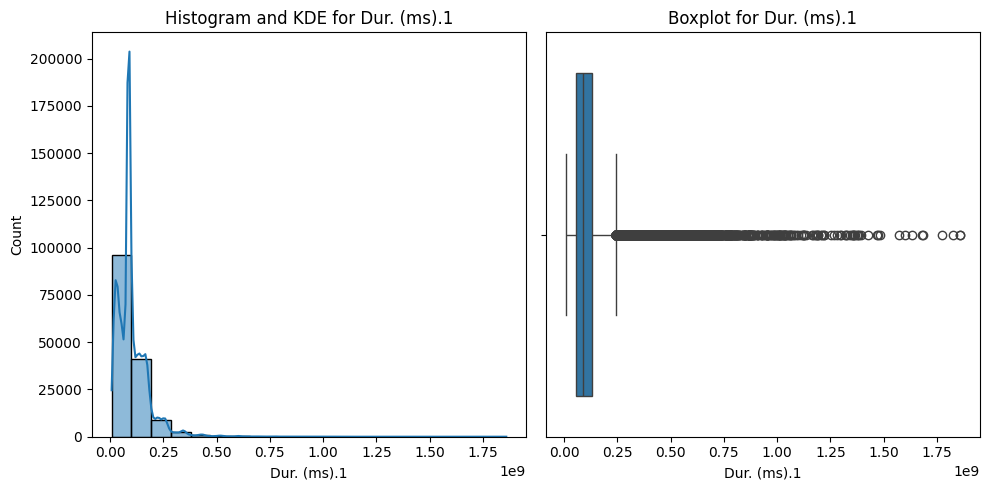

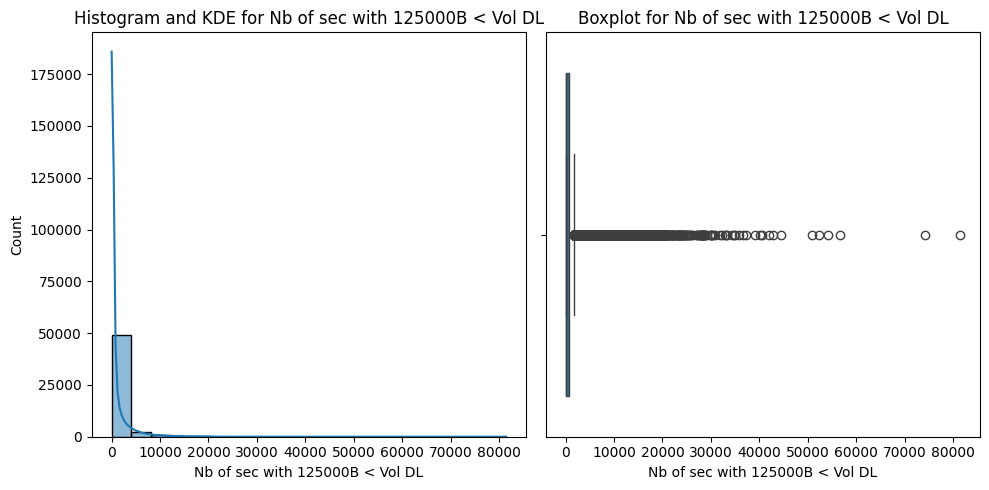

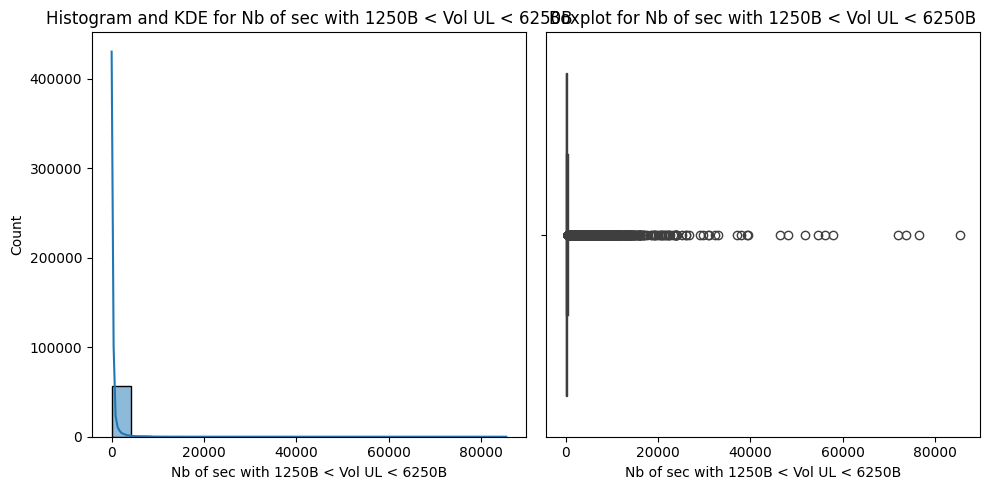

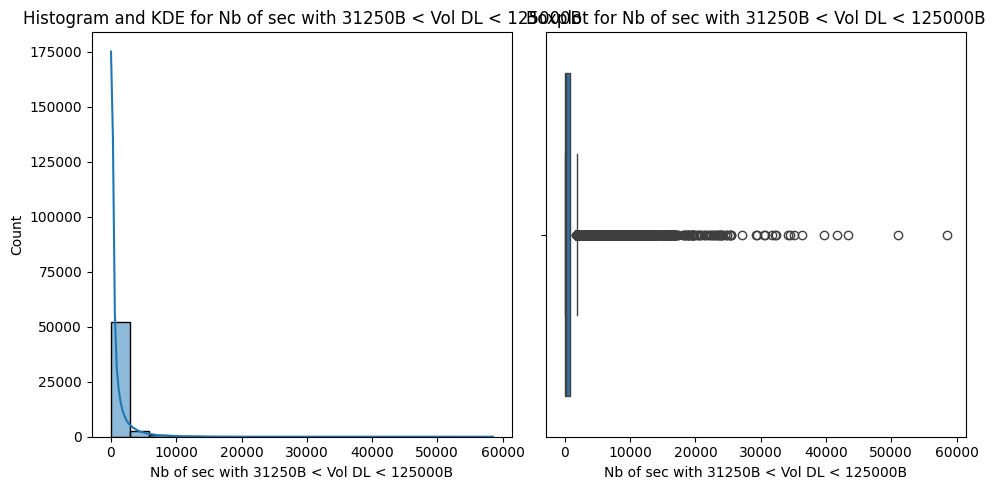

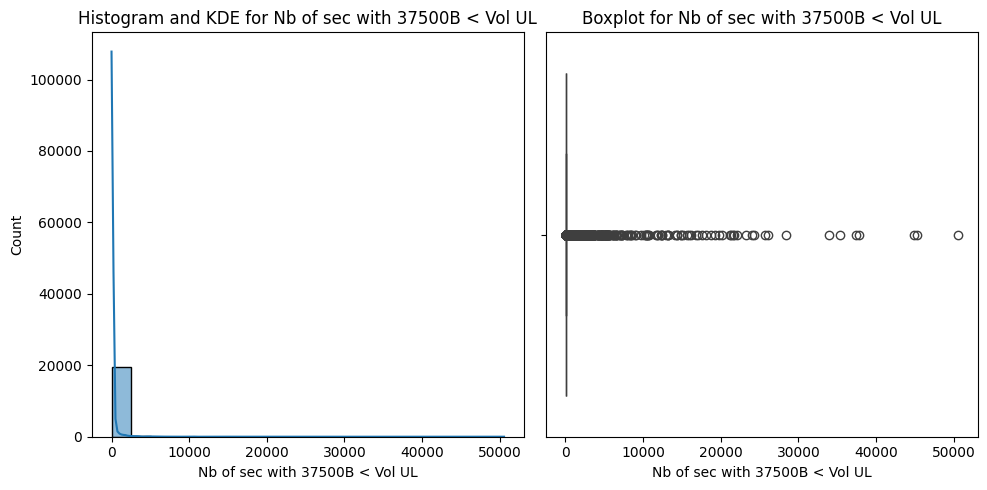

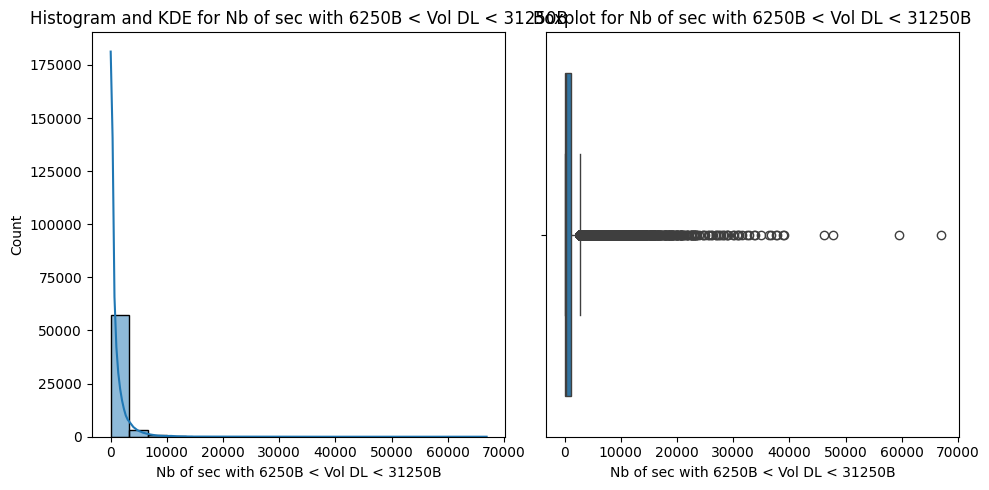

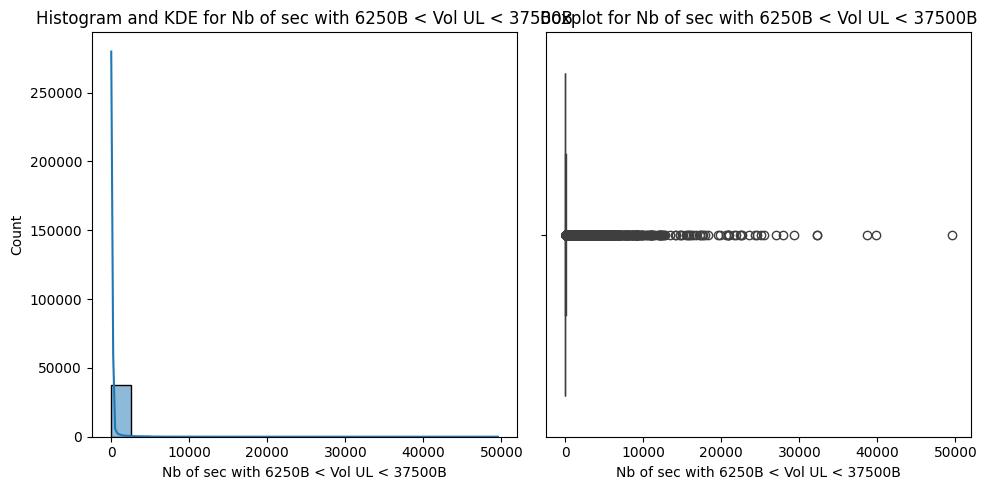

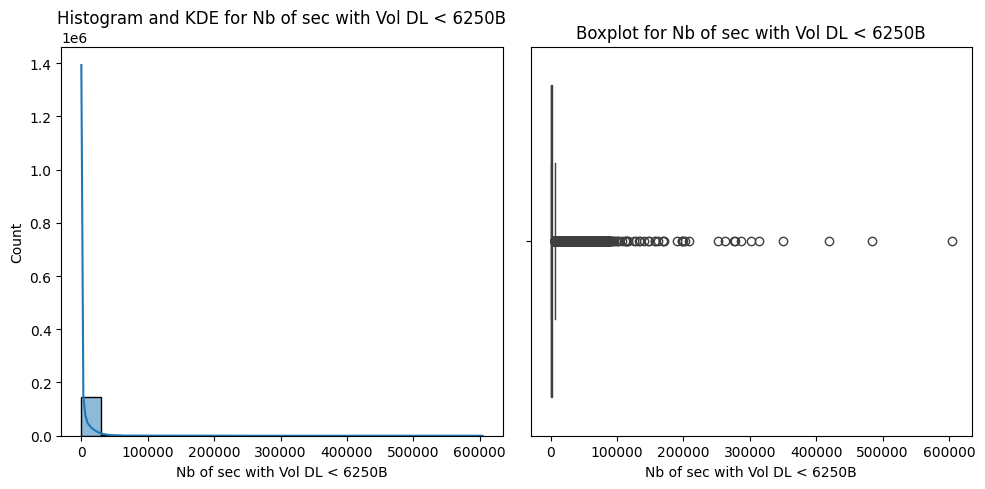

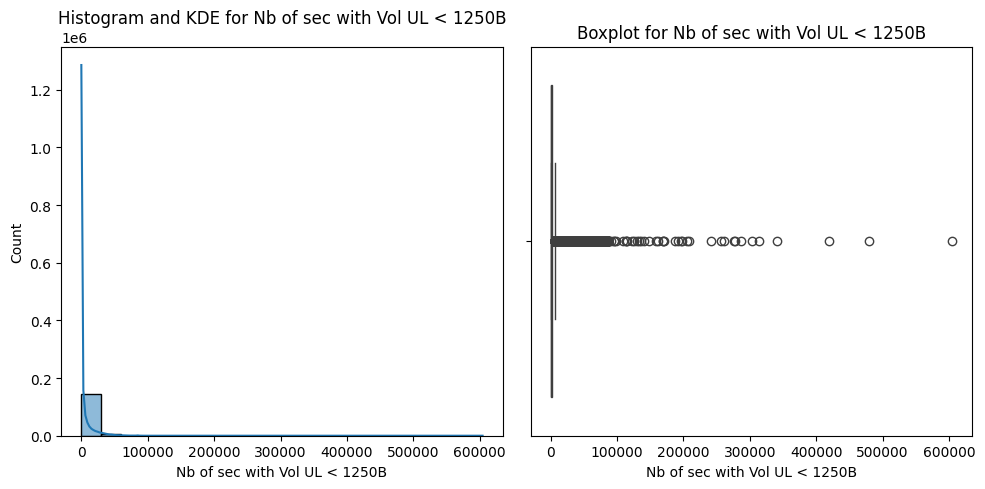

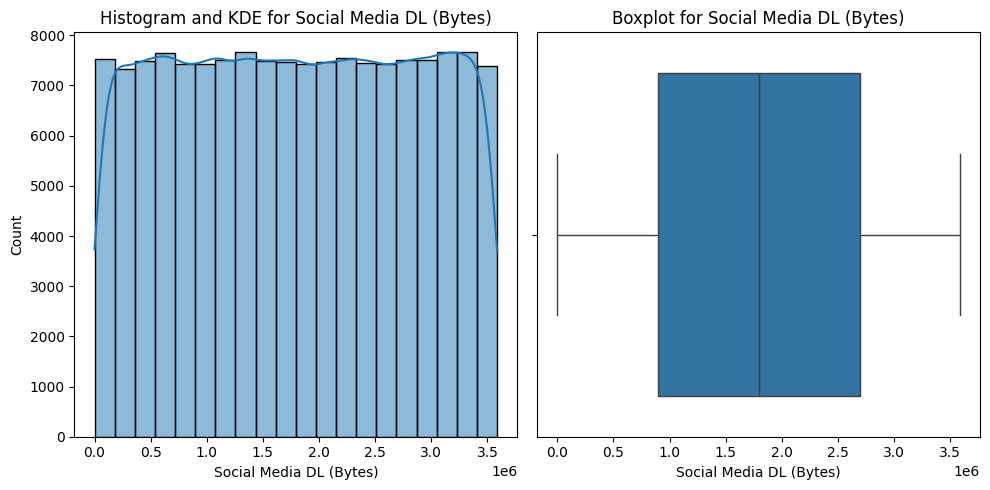

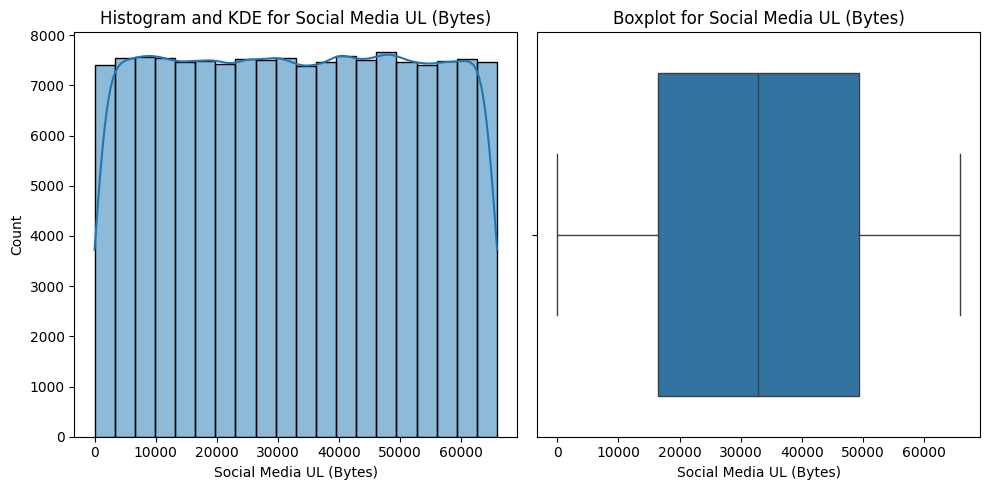

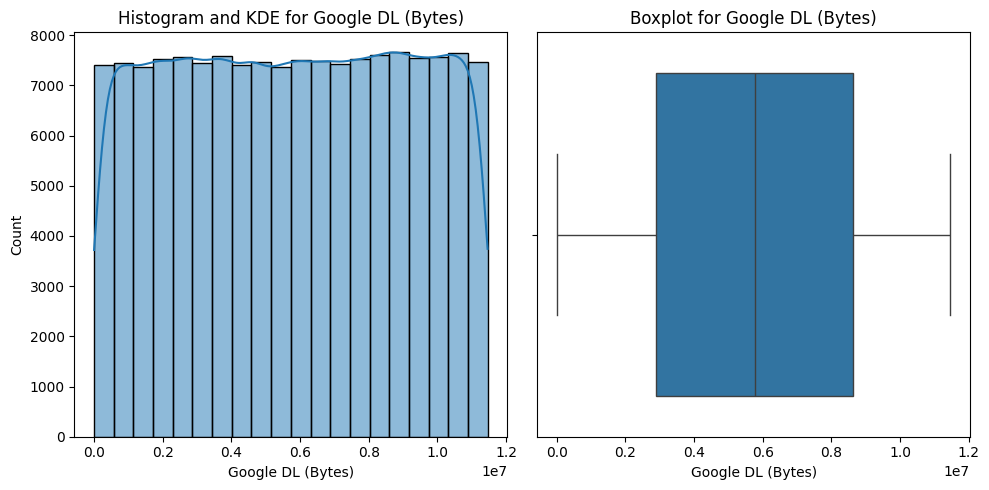

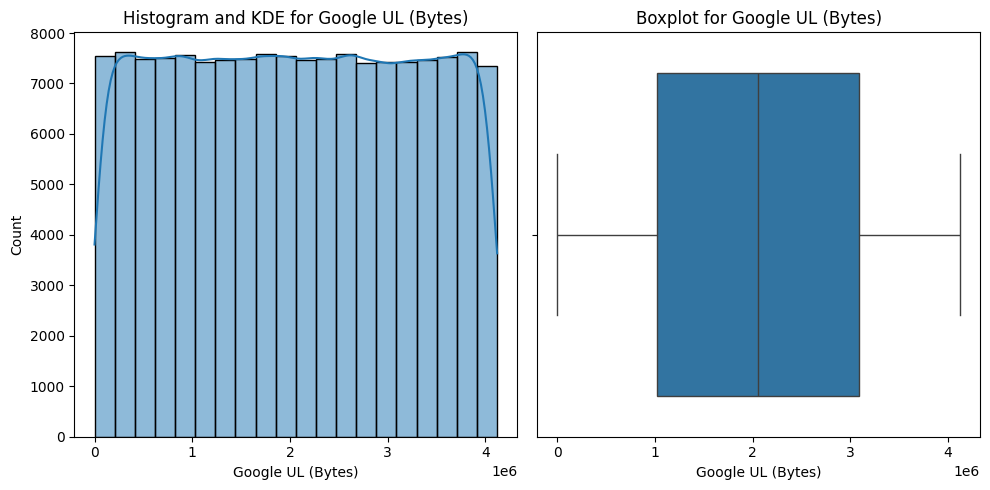

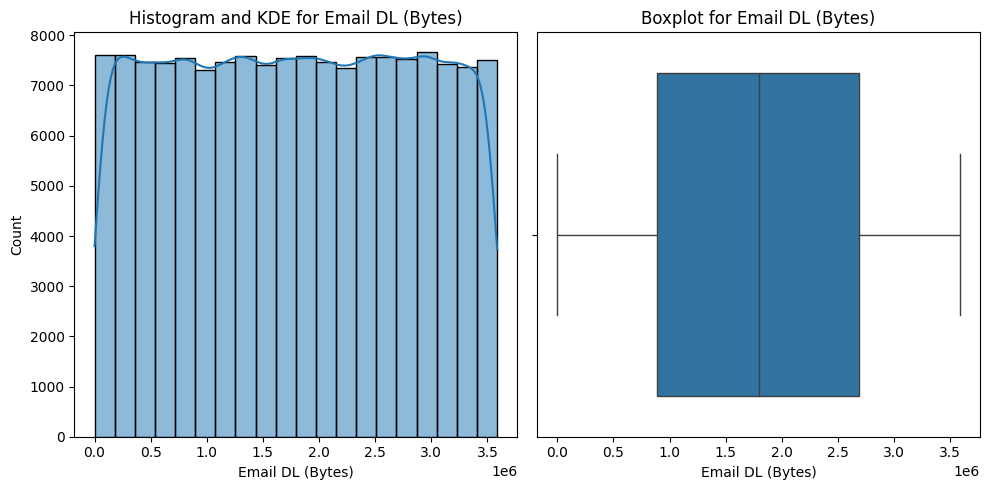

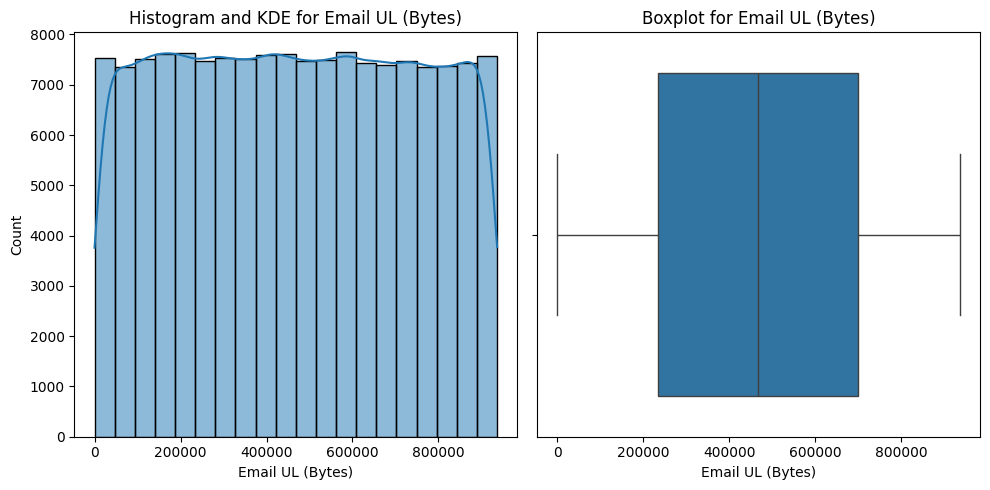

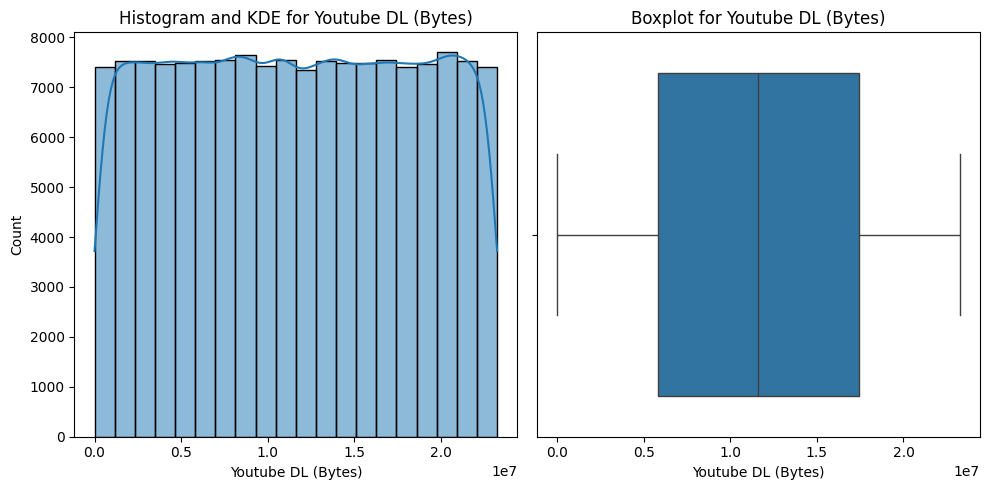

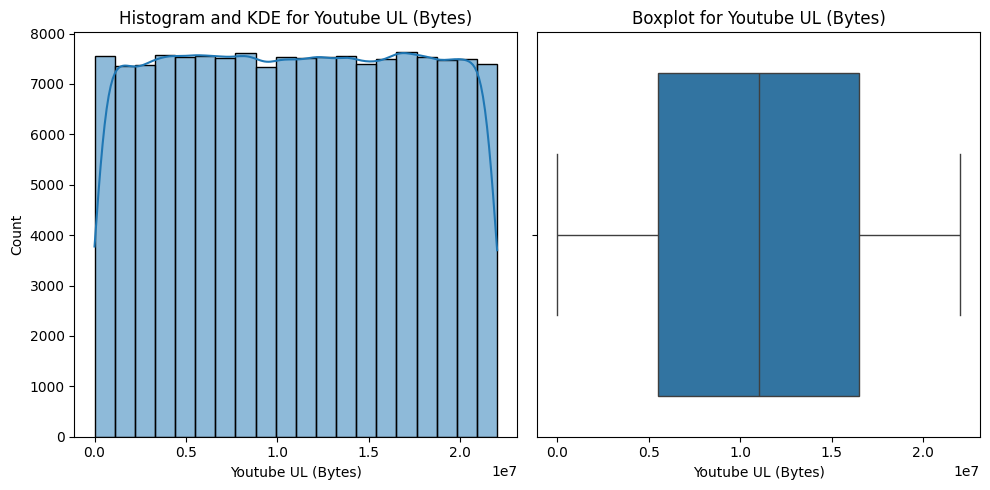

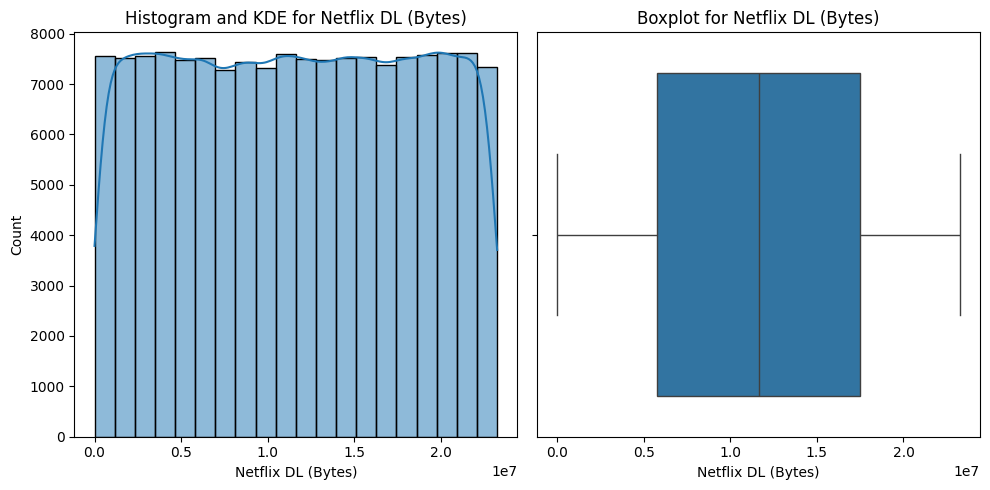

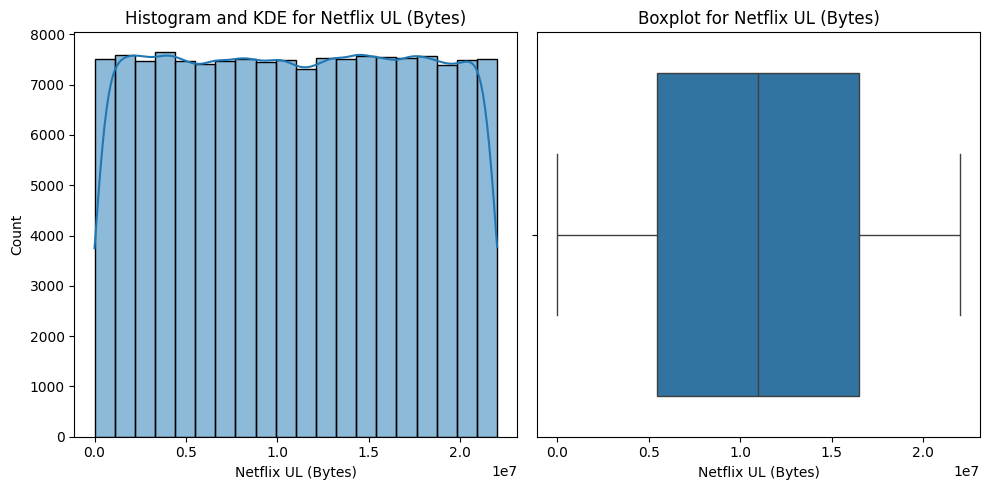

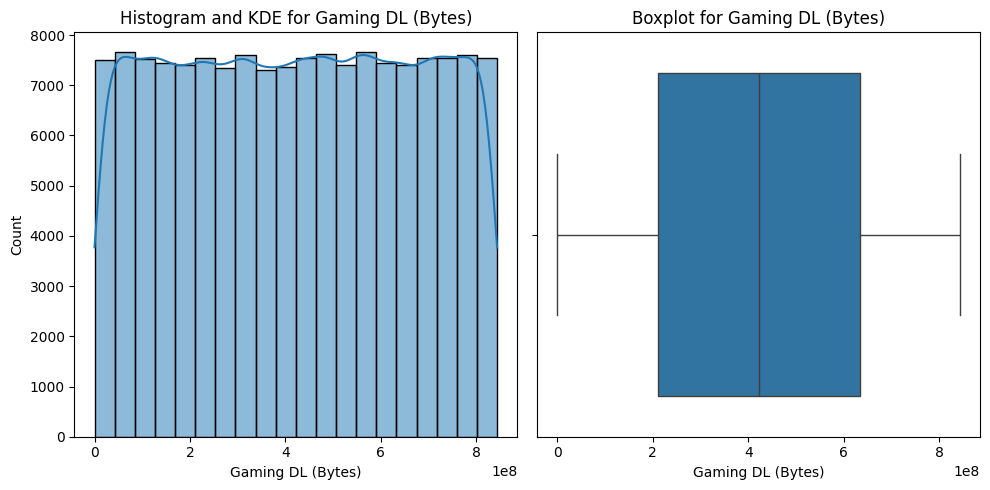

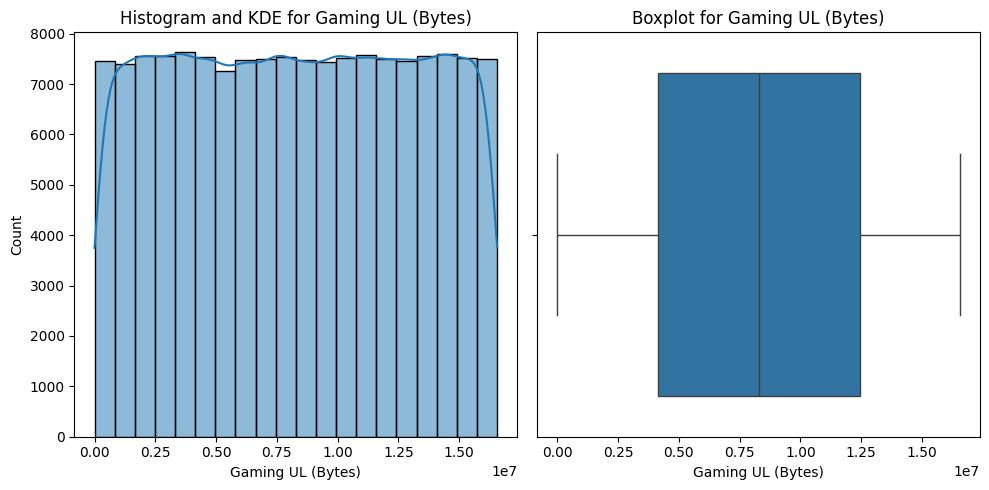

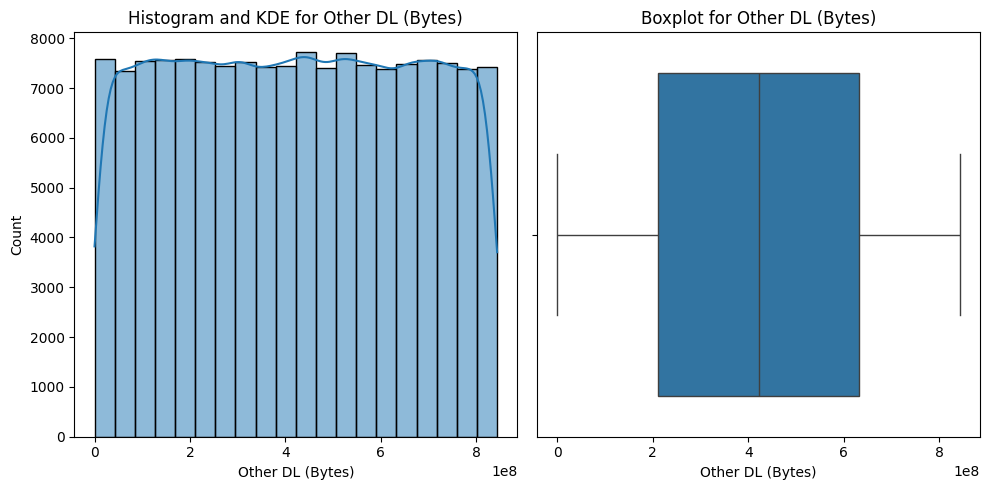

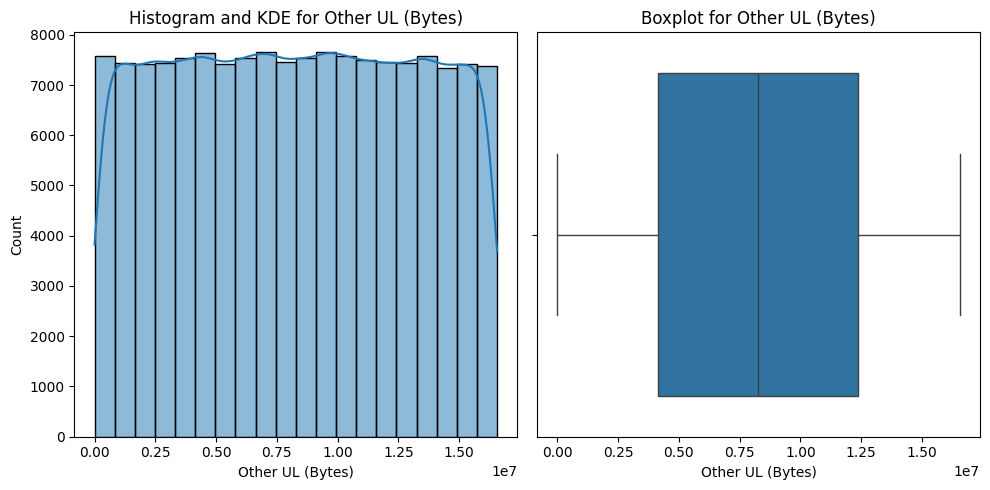

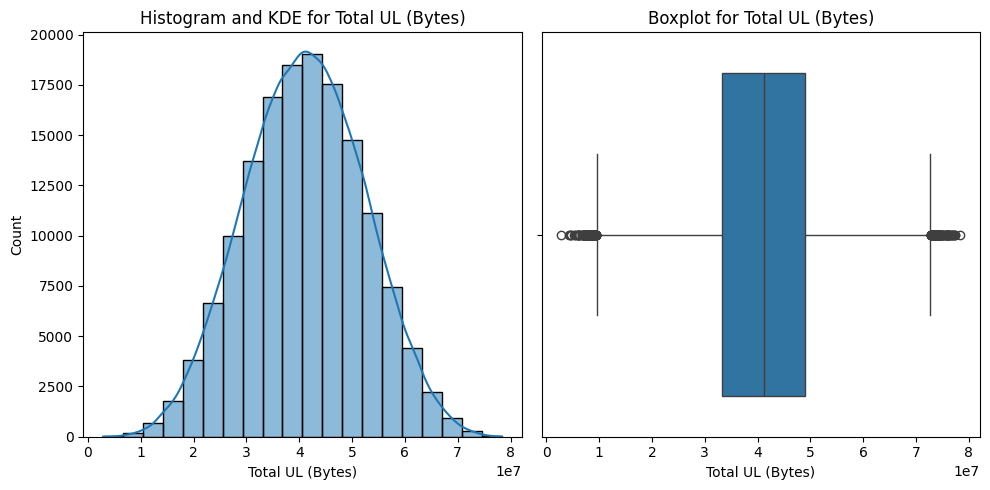

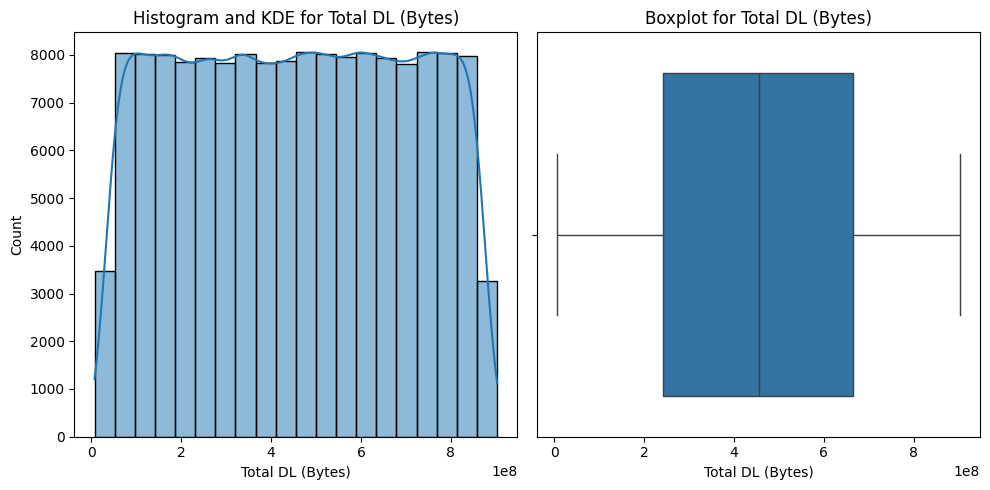

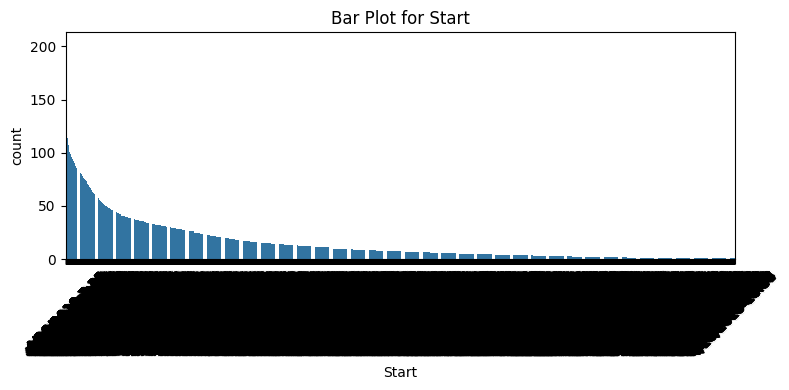

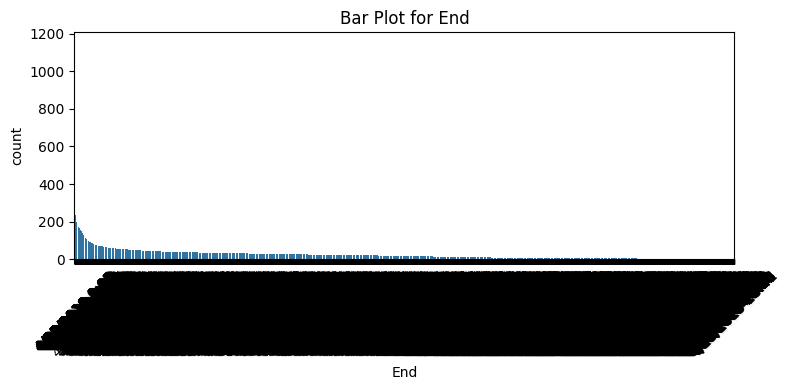

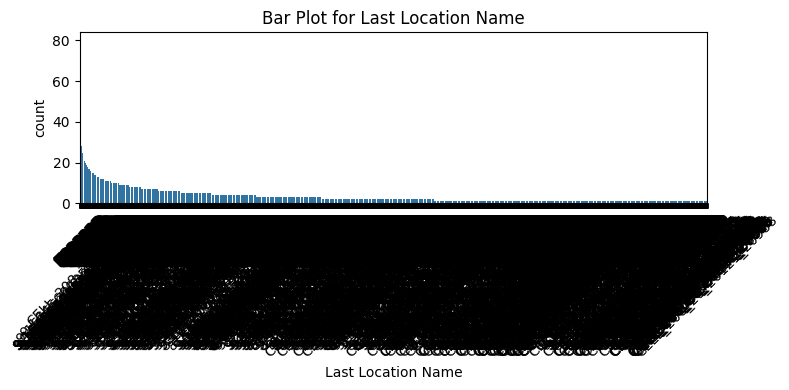

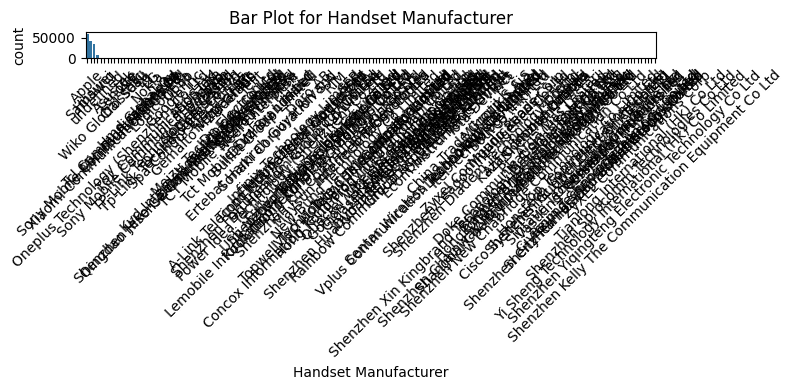

C:\Users\CraftSoft\AppData\Local\Temp\ipykernel_8740\2254030050.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


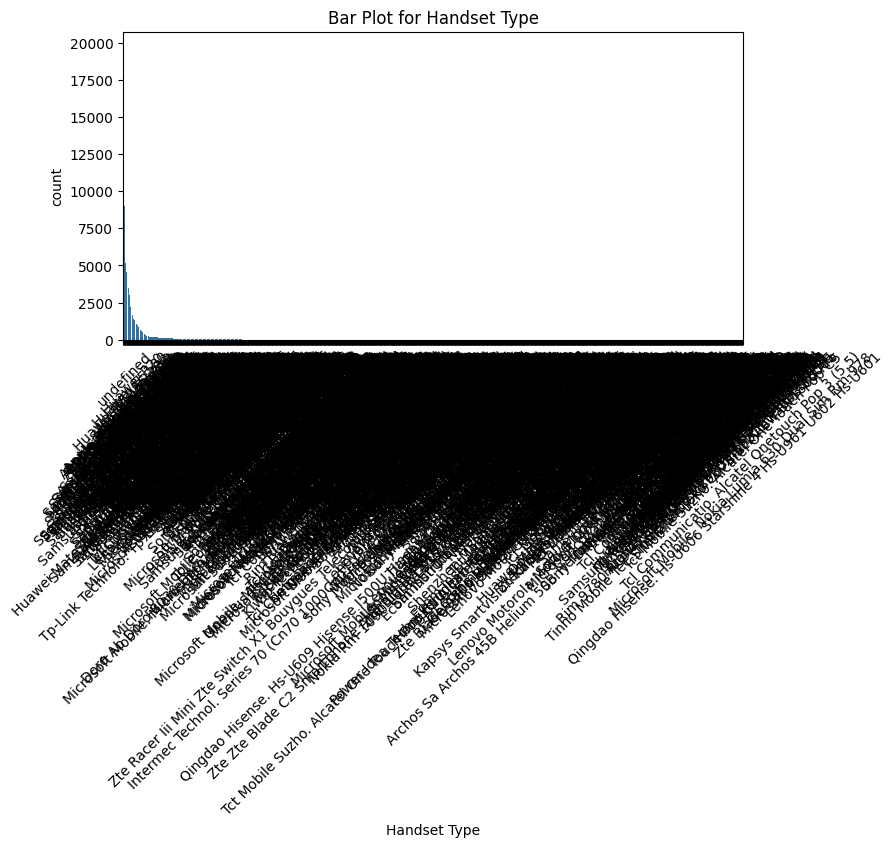

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Fetch the data
df = fetch_data(conn)

def graphical_univariate_analysis(df):
    # Separate numeric and categorical columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    # Plot for numeric columns
    for column in numeric_columns:
        plt.figure(figsize=(10, 5))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True, bins=20)
        plt.title(f"Histogram and KDE for {column}")
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot for {column}")
        
        plt.tight_layout()
        plt.show()
        
    # Plot for categorical columns
    for column in categorical_columns:
        plt.figure(figsize=(8, 4))
        
        # Bar plot
        sns.countplot(x=df[column], order=df[column].value_counts().index)
        plt.title(f"Bar Plot for {column}")
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()

# Run the analysis
graphical_univariate_analysis(df)


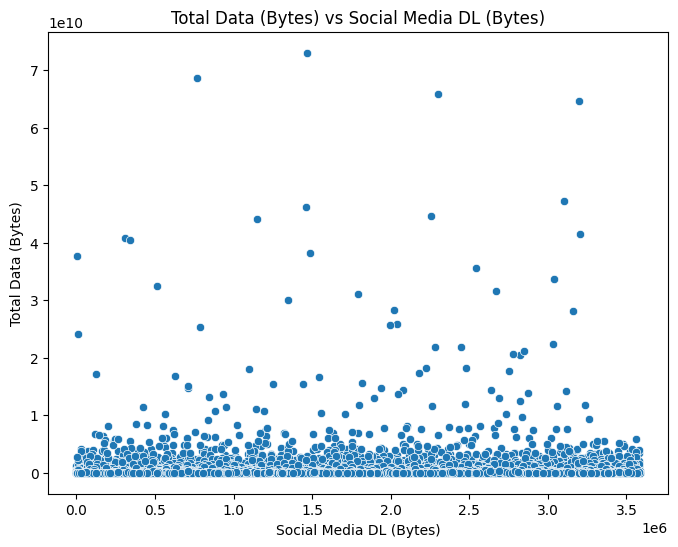

Correlation between Social Media DL (Bytes) and Total Data (Bytes): 0.00



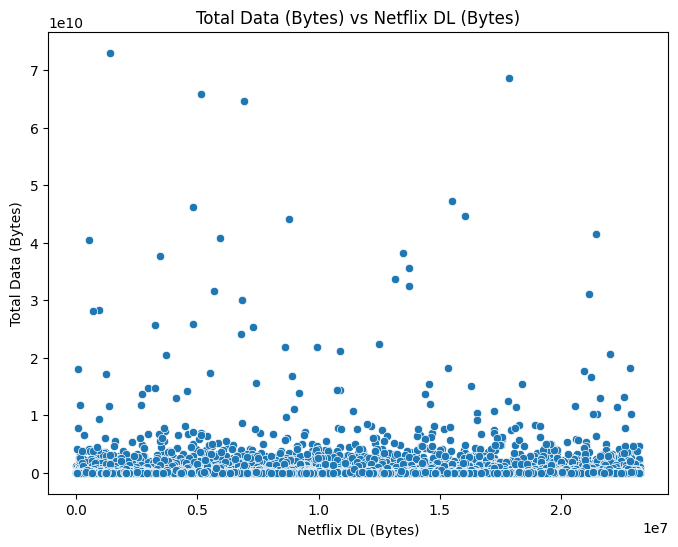

Correlation between Netflix DL (Bytes) and Total Data (Bytes): -0.01



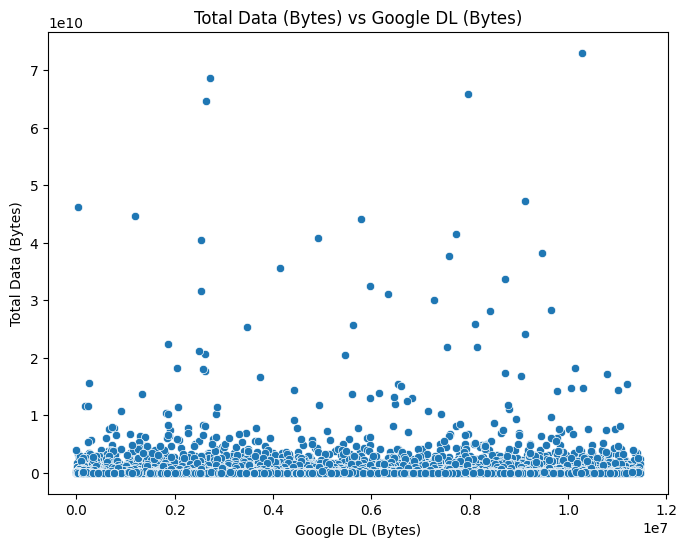

Correlation between Google DL (Bytes) and Total Data (Bytes): -0.00



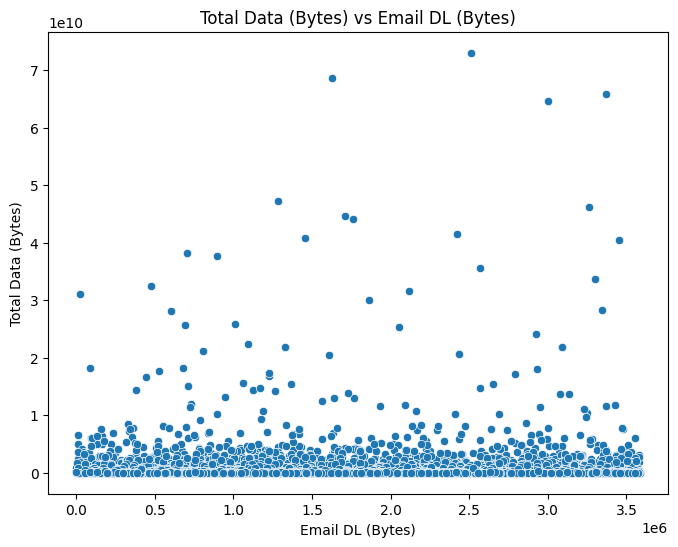

Correlation between Email DL (Bytes) and Total Data (Bytes): 0.00



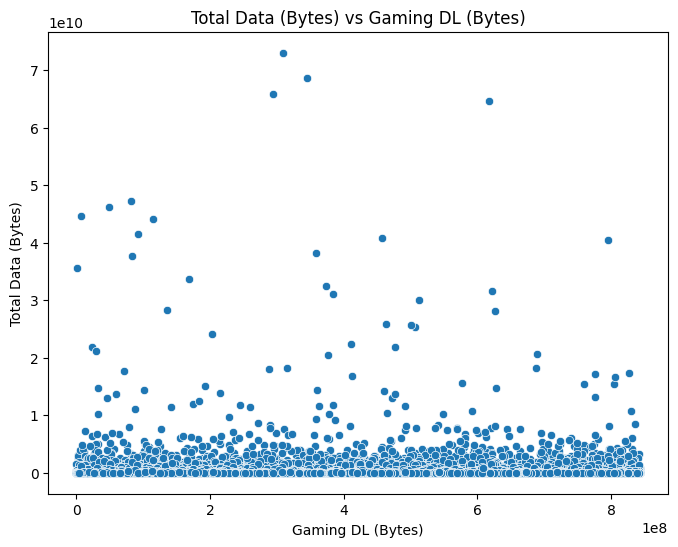

Correlation between Gaming DL (Bytes) and Total Data (Bytes): -0.01



In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch the data
df = fetch_data(conn)

# Step 1: Calculate total data (DL + UL)
df['Total Data (Bytes)'] = df['HTTP DL (Bytes)'] + df['HTTP UL (Bytes)']

# List of applications you want to analyze
applications = [
    'Social Media DL (Bytes)', 'YouTube DL (Bytes)', 'Netflix DL (Bytes)',
    'Google DL (Bytes)', 'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL'
]

# Step 2: Create a scatter plot for each application vs Total Data
def bivariate_analysis(df, applications):
    for app in applications:
        # Check if both columns exist in the dataframe
        if app in df.columns:
            plt.figure(figsize=(8, 6))
            
            # Scatter plot for each application vs Total Data
            sns.scatterplot(x=df[app], y=df['Total Data (Bytes)'])
            plt.title(f"Total Data (Bytes) vs {app}")
            plt.xlabel(app)
            plt.ylabel('Total Data (Bytes)')
            plt.show()

            # Correlation coefficient
            corr = df[[app, 'Total Data (Bytes)']].corr().iloc[0, 1]
            print(f"Correlation between {app} and Total Data (Bytes): {corr:.2f}\n")

# Step 3: Run the bivariate analysis
bivariate_analysis(df, applications)


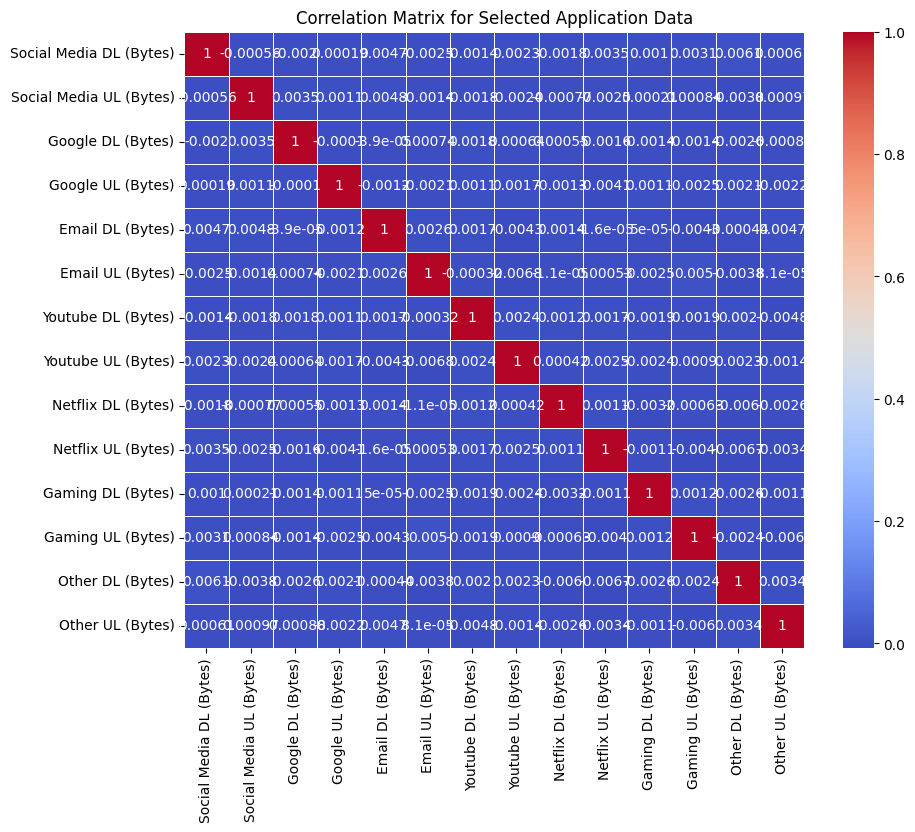

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fetch the data
df = fetch_data(conn)

# Step 1: Select the columns for correlation analysis
correlation_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Step 2: Calculate the correlation matrix for the selected variables
correlation_matrix = df[correlation_columns].corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Selected Application Data")
plt.show()


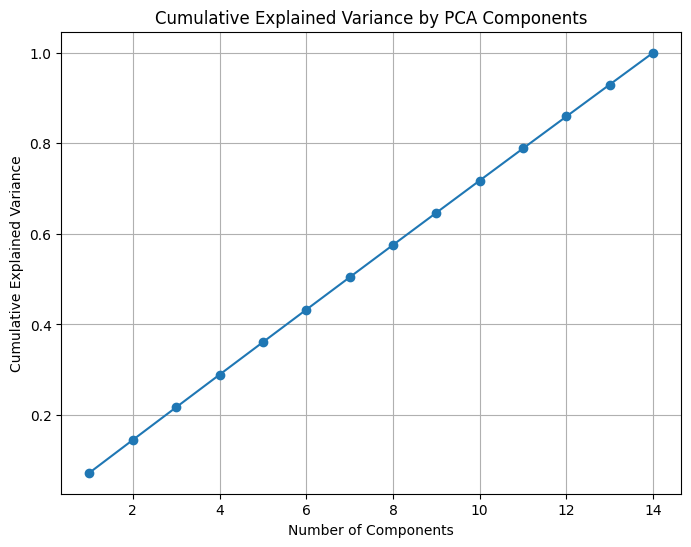

Explained Variance Ratio: [0.07259283 0.07242906 0.07211392 0.07197411 0.0717675  0.07167547
 0.0715473  0.07137681 0.07118286 0.07108046 0.07091994 0.07059717
 0.07049455 0.07024801]
Principal Components: [[ 0.3115541  -0.13763281 -0.15818078  0.22428686 -0.02656343 -0.39231481
   0.01568496  0.27087659 -0.31134154 -0.19571501  0.01604047 -0.17866973
   0.60161471  0.22598777]
 [ 0.02443168  0.31576109  0.0252655  -0.0648027   0.46780061  0.19191618
  -0.26385417 -0.45127842 -0.14445157 -0.25241701  0.06593535 -0.1725915
   0.05057723  0.4946169 ]
 [-0.01569715 -0.00176825 -0.13349344  0.08067916 -0.3415391   0.18508816
  -0.3052     -0.14749372 -0.28871556 -0.40426424  0.28534852  0.59374941
   0.06869764 -0.15538685]
 [ 0.47850802 -0.30613938 -0.42929293 -0.42082063  0.14988958  0.19047171
  -0.15705614 -0.04512785 -0.05202865  0.43729845  0.03377773  0.17635797
   0.02554734  0.06036698]
 [ 0.31326414  0.44457531  0.04430736  0.14450367  0.16069154 -0.41136524
  -0.15612938  0.1161

In [40]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Select relevant columns and standardize the data
correlation_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Drop missing columns and rows with missing data
df_cleaned = df[correlation_columns].dropna()

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)

# Step 2: Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Step 3: Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step 4: Print explained variance and PCA components
explained_variance = pca.explained_variance_ratio_
components = pca.components_

print("Explained Variance Ratio:", explained_variance)
print("Principal Components:", components)
